- 方法相同、拟合参数表达不同 ：  模拟拟合参数不同，EQ13
- 回归方程 ：要加时间限制，否则结果不一样；
- 函数中自动跳过为空的数据 ；联立方程可以定义每个方程的数据源？ 
- 单一方程式 ：预测与excel有差异 ，excel预测值是“联立方程的预测结果”？
- 单一方程参数 = 联立方程参数 ？ 基线拟合参数 = 场景拟合参数
- d 哑变量，是否作为数据源不变，还是需要提取规则，当其它发生变化，可能引起d变量发生改变

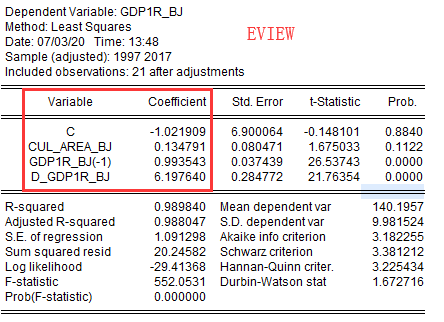

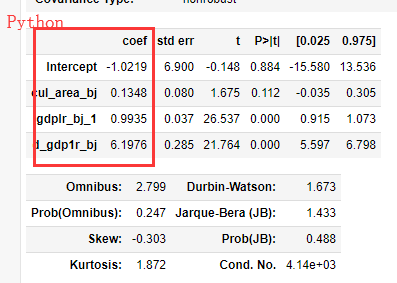

In [2]:
#引包：引入所需python包
import xlrd
import os
import re
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm

from sklearn.metrics import roc_curve,auc
import matplotlib as mpl
from matplotlib import pyplot as plt
from numpy import nan
from sklearn import linear_model, datasets
from sklearn.model_selection import train_test_split
from statsmodels.tsa.statespace.sarimax import SARIMAX
import seaborn as sns
import time

from scipy.stats import kstest
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [3]:
dir = r"./data/"
print(os.listdir(dir))  #手术种类

['【20200703】-预测误差(2015-2017).xls', '【20200703】-模拟（2016，10）-3.xls', '【20200703】-模拟（2016，6-8）-2.xls', '【20200703】-模拟（2016,1-4）-1.xls', '其它数据.csv', '.ipynb_checkpoints', 'alleviewsdata.xlsx', '方程描述.csv']


# 数据源

## excel数据源
- 通过"预测误差表"获得数据源；

- 也可以通过模拟误差获得数据源，但是那样更复杂一些。

In [4]:
file = "alleviewsdata.xlsx"
df_ev= pd.read_excel(dir+file,"Sheet1",index_col = 0 ,na_values=['9999'])
df_ev.columns = df_ev.columns.str.lower()
df_ev.columns

Index(['con_fn_bj', 'con_fn_bj_0', 'con_fn_bj_1', 'con_fn_bj_10',
       'con_fn_bj_2', 'con_fn_bj_3', 'con_fn_bj_4', 'con_fn_bj_5',
       'con_fn_bj_6', 'con_fn_bj_7',
       ...
       'yht_un_tj_1', 'yht_un_tj_10', 'yht_un_tj_2', 'yht_un_tj_3',
       'yht_un_tj_4', 'yht_un_tj_5', 'yht_un_tj_6', 'yht_un_tj_7',
       'yht_un_tj_8', 'yht_un_tj_9'],
      dtype='object', length=3722)

## 衍生变量
- 根据定义式衍生的变量

# 定义
## 参数
## 函数

# 北京
## Eq 1 : gdp1r_bj 行为方程 ok
行为方程 ： gdp1r_bj  = cul_area_bj + gdp1r_bj(-1) + d_gdp1r_bj

In [14]:
test1 = df_ev[["gdp1r_bj","cul_area_bj","d_gdp1r_bj"]]
test1["gdplr_bj_s1"] = test1["gdp1r_bj"].shift(1)  ##直接写进表达式，结果有差异
test1 = test1[(test1.index>1996) & (test1.index <2018)]
test1.head(2)

,gdp1r_bj,cul_area_bj,d_gdp1r_bj,gdplr_bj_s1
1997,126.272872,34.2,0.0,124.041239
1998,127.361097,34.1,0.0,126.272872


In [15]:
results = sm.ols(formula = "gdp1r_bj ~ cul_area_bj  + gdplr_bj_s1 + d_gdp1r_bj",data = test1).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               gdp1r_bj   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     552.1
Date:                Thu, 09 Jul 2020   Prob (F-statistic):           3.91e-17
Time:                        08:13:11   Log-Likelihood:                -29.414
No. Observations:                  21   AIC:                             66.83
Df Residuals:                      17   BIC:                             71.01
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -1.0219      6.900     -0.148      0.884     -15.580      13.536
cul_area_bj     0.1348      0.080      1.675      0.112      -0.035       0.305
gdplr_bj_s1     0.9935      0.037     26.537      0.000       0.915       1.073
d_gdp1r_bj      6.1976      0.285     21.764      0.000       5.597       6.798
==============================================================================
Omnibus:                        2.799   Durbin-Watson:                   1.673
Prob(Omnibus):                  0.247   Jarque-Bera (JB):                1.433
Skew:                          -0.303   Prob(JB):                        0.488
Kurtosis:                       1.872   Cond. No.                     4.14e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.14e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [114]:
results.predict()

array([126.82820558, 129.03194867, 130.07270933, 133.38891309,
       137.72502094, 141.37904066, 142.38851322, 141.8252671 ,
       138.50468726, 138.98539273, 139.88213844, 142.42550053,
       150.03792225, 147.17252221, 148.18577519, 152.51597548,
       156.50725341, 158.46014552, 139.83986369, 128.98768591,
       119.96448788])

In [115]:
test1["gdp1r_bj"]

obs
1997    126.272872
1998    127.361097
1999    130.820954
2000    134.439627
2001    138.971821
2002    142.686523
2003    140.573841
2004    140.391340
2005    137.756210
2006    138.672350
2007    141.232242
2008    142.724052
2009    149.237610
2010    147.165622
2011    148.418572
2012    153.059582
2013    157.533902
2014    157.515500
2015    140.400000
2016    128.226331
2017    120.648922
Name: gdp1r_bj, dtype: float64

## Eq2: gdpn_bj 定义方程 ok
定义方程 ： gdpn_bj  = gdp1n_bj  + gdp2n_bj  + gdp3n_bj

In [16]:
test1 = df_ev[["gdpn_bj","gdp1n_bj","gdp2n_bj","gdp3n_bj"]]
test1 = test1[(test1.index>1996) & (test1.index <2018)]
test1["预测"] = test1["gdp1n_bj"] + test1["gdp2n_bj"] + test1["gdp3n_bj"]
test1.head(2)

,gdpn_bj,gdp1n_bj,gdp2n_bj,gdp3n_bj,预测
1997,2096.8,77.2,783.6,1236.0,2096.8
1998,2406.2,77.9,844.4,1483.9,2406.2


## Eq3 ：gdpr_bj 定义方程 ok
定义方程 ： gdpr_bj  = gdp1r_bj  + gdp2r_bj  + gdp3r_bj

In [17]:
test1 = df_ev[["gdpr_bj","gdp1r_bj","gdp2r_bj","gdp3r_bj"]]
test1 = test1[(test1.index>1996) & (test1.index <2018)]
test1["预测"] = test1["gdp1r_bj"] + test1["gdp2r_bj"] + test1["gdp3r_bj"]
test1.head(2)

,gdpr_bj,gdp1r_bj,gdp2r_bj,gdp3r_bj,预测
1997,3954.928483,126.272872,958.614649,2870.040962,3954.928483
1998,4334.706383,127.361097,1049.066999,3158.278288,4334.706383


## Eq4 : gdp1n_bj 定义方程 ok
定义方程 ： gdp1n_bj  = gdp1r_bj  * gdp1d_bj  / 100

In [18]:
test1 = df_ev[["gdp1n_bj","gdp1r_bj","gdp1d_bj"]]
test1 = test1[(test1.index>1996) & (test1.index <2018)]
test1["验证结果"] = test1["gdp1r_bj"]*test1["gdp1d_bj"]/100
test1.head(2)

,gdp1n_bj,gdp1r_bj,gdp1d_bj,验证结果
1997,77.2,126.272872,61.137439,77.2
1998,77.9,127.361097,61.164674,77.9


## Eq5 : gdp2_indan_bj 定义方程 ok
定义方程 ： gdp2_indan_bj  = gdp2_indar_bj  * gdp2_indad_bj  / 100


In [20]:
test1 = df_ev[["gdp2_indan_bj","gdp2_indar_bj","gdp2_indad_bj"]]
test1 = test1[(test1.index>1996) & (test1.index <2018)]
test1["验证结果"] = test1["gdp2_indar_bj"]*test1["gdp2_indad_bj"]/100
test1.head(2)

,gdp2_indan_bj,gdp2_indar_bj,gdp2_indad_bj,验证结果
1997,639.7,752.168139,85.047474,639.7
1998,676.0,818.444916,82.595662,676.0


## Eq6 ：gdp2_bindan_bj 定义方程 ok
定义方程 ： gdp2_bindan_bj  = gdp2_bindar_bj  * gdp2_bindad_bj  / 100

In [22]:
test1 = df_ev[["gdp2_bindan_bj","gdp2_bindar_bj","gdp2_bindad_bj"]]
test1 = test1[(test1.index>1996) & (test1.index <2018)]
test1["预测"] = test1["gdp2_bindar_bj"]*test1["gdp2_bindad_bj"]/100
test1.head(2)

,gdp2_bindan_bj,gdp2_bindar_bj,gdp2_bindad_bj,预测
1997,146.5,197.000053,74.365462,146.5
1998,171.0,225.188061,75.936530,171.0


## Eq7 : gdp2n_bj 定义方程 ok
定义方程 ： gdp2n_bj  = gdp2r_bj  * gdp2d_bj  / 100


In [25]:
test1 = df_ev[["gdp2n_bj","gdp2r_bj","gdp2d_bj"]]
test1 = test1[(test1.index>1996) & (test1.index <2018)]
test1["预测"] = test1["gdp2r_bj"]*test1["gdp2d_bj"]/100
test1.head(2)

,gdp2n_bj,gdp2r_bj,gdp2d_bj,预测
1997,783.6,958.614649,81.742961,783.6
1998,844.4,1049.066999,80.490569,844.4


## Eq8 ： gdp2r_bj2 定义方程 ok
定义方程 ： gdp2r_bj2  = gdp2_indar_bj  + gdp2_bindar_bj  + gdp2r_erro_bj

In [29]:
test1 = df_ev[["gdp2r_bj2","gdp2_indar_bj","gdp2_bindar_bj","gdp2r_erro_bj"]]
test1 = test1[(test1.index>1996) & (test1.index <2018)]
test1["预测"] = test1["gdp2_indar_bj"] + test1["gdp2_bindar_bj"] + test1["gdp2r_erro_bj"]
test1.head(2)

,gdp2r_bj2,gdp2_indar_bj,gdp2_bindar_bj,gdp2r_erro_bj,预测
1997,958.614649,752.168139,197.000053,9.446457,958.614649
1998,1049.066999,818.444916,225.188061,5.434022,1049.066999


## Eq9 : gdp2r_bj1 行为方程 ok
行为方程 ： gdp2r_bj1  = @coef(1)  + @coef(2) * gdp_tecn_bj / gdp2d_bj  + @coef(3) * gdp2r_bj1(-1)  + @coef(4) * d_gdp2r_bj_1

- gdp_tecn_bj / gdp2d_bj : 可以将表达式写入方程中，但参数估计结果不一样

In [33]:
test1 = df_ev[["gdp2r_bj1","gdp_tecn_bj","gdp2d_bj","d_gdp2r_bj_1"]]
test1["gdp2r_bj1_s1"] = test1["gdp2r_bj1"].shift(1)
test1["gdp_tecn_gdp2d"] = test1["gdp_tecn_bj"]/test1["gdp2d_bj"]
test1 = test1[(test1.index>2003) & (test1.index <2019)]
test1.head(2)

,gdp2r_bj1,gdp_tecn_bj,gdp2d_bj,d_gdp2r_bj_1,gdp2r_bj1_s1,gdp_tecn_gdp2d
2004,2023.418698,370.6,92.304178,0.0,1725.142316,4.014986
2005,2224.489155,504.4,91.958192,-0.5,2023.418698,5.485101


In [34]:
#results = sm.ols(formula = "gdp2r_bj1 ~ gdp_tecn_bj/gdp2d_bj  + gdp2r_bj1.shift(1) + d_gdp2r_bj_1",data = test1 ).fit()
results = sm.ols(formula = "gdp2r_bj1 ~ gdp_tecn_gdp2d  + gdp2r_bj1_s1 + d_gdp2r_bj_1",data = test1 ).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              gdp2r_bj1   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.283e+04
Date:                Thu, 09 Jul 2020   Prob (F-statistic):           9.06e-20
Time:                        08:21:47   Log-Likelihood:                -64.871
No. Observations:                  15   AIC:                             137.7
Df Residuals:                      11   BIC:                             140.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        342.4635     33.177     10.322      0.000     269.442     415.485
gdp_tecn_gdp2d     1.4938      0.641      2.330      0.040       0.082       2.905
gdp2r_bj1_s1       0.9700      0.014     69.798      0.000       0.939       1.001
d_gdp2r_bj_1     155.2133      8.618     18.011      0.000     136.246     174.180
==============================================================================
Omnibus:                        1.380   Durbin-Watson:                   2.420
Prob(Omnibus):                  0.501   Jarque-Bera (JB):                1.054
Skew:                          -0.593   Prob(JB):                        0.590
Kurtosis:                       2.470   Cond. No.                     2.17e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.17e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Eq10 ：gdp2r_bj 定义方程  ok
定义方程 ： gdp2r_bj  = (gdp2r_bj1  + gdp2r_bj2)  / 2

In [37]:
test1 = df_ev[["gdp2r_bj","gdp2r_bj1","gdp2r_bj2"]]
test1 = test1[(test1.index>1996) & (test1.index <2018)]
test1["预测"] = (test1["gdp2r_bj1"] + test1["gdp2r_bj2"])/2
test1.head(2)

,gdp2r_bj,gdp2r_bj1,gdp2r_bj2,预测
1997,958.614649,958.614649,958.614649,958.614649
1998,1049.066999,1049.066999,1049.066999,1049.066999


## Eq11 :gdp3n_bj 定义方程 ok
定义方程 ： gdp3n_bj  = gdp3r_bj  * gdp3d_bj  / 100

In [38]:
test1 = df_ev[["gdp3n_bj","gdp3r_bj","gdp3d_bj"]]
test1 = test1[(test1.index>1996) & (test1.index <2018)]
test1["预测"] = (test1["gdp3r_bj"] * test1["gdp3d_bj"])/100
test1.head(2)

,gdp3n_bj,gdp3r_bj,gdp3d_bj,预测
1997,1236.0,2870.040962,43.065587,1236.0
1998,1483.9,3158.278288,46.984460,1483.9


## Eq12 : gdp2_indar_bj 行为方程 ok
log(gdp2_indar_bj)  = @coef(1)  + @coef(2) * log(consr_bj)  + @coef(3) * log(investr_bj)  + @coef(4) * log(exusd_bj * exrate_cn)  + @coef(5) * d_gdp2_indar_bj

In [6]:
test1 = df_ev[["gdp2_indar_bj","consr_bj","investr_bj","exusd_bj","exrate_cn","d_gdp2_indar_bj"]]
test1 = test1[(test1.index>1995) & (test1.index <2019)]
test1.head(2)

,gdp2_indar_bj,consr_bj,investr_bj,exusd_bj,exrate_cn,d_gdp2_indar_bj
1996,691.916524,1582.300379,1148.028576,81.1975,831.42,0.0
1997,752.168139,1710.591485,1225.309912,96.1103,828.98,0.0


In [7]:
results = sm.ols(formula = "np.log(gdp2_indar_bj) ~ np.log(consr_bj)  + np.log(investr_bj) + np.log(exusd_bj * exrate_cn) + d_gdp2_indar_bj",data = test1 ).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(gdp2_indar_bj)   R-squared:                       0.997
Model:                               OLS   Adj. R-squared:                  0.996
Method:                    Least Squares   F-statistic:                     1529.
Date:                   Thu, 16 Jul 2020   Prob (F-statistic):           1.61e-22
Time:                           02:51:55   Log-Likelihood:                 46.404
No. Observations:                     23   AIC:                            -82.81
Df Residuals:                         18   BIC:                            -77.13
Df Model:                              4                                         
Covariance Type:               nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       -0.1461      0.193     -0.757      0.459      -0.552       0.260
np.log(consr_bj)                 0.2604      0.092      2.840      0.011       0.068       0.453
np.log(investr_bj)               0.5564      0.104      5.365      0.000       0.339       0.774
np.log(exusd_bj * exrate_cn)     0.0796      0.037      2.159      0.045       0.002       0.157
d_gdp2_indar_bj                  0.0901      0.024      3.682      0.002       0.039       0.141
==============================================================================
Omnibus:                        0.116   Durbin-Watson:                   1.399
Prob(Omnibus):                  0.944   Jarque-Bera (JB):                0.067
Skew:                          -0.078   Prob(JB):                        0.967
Kurtosis:                       2.786   Cond. No.                         465.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
np.exp(results.predict())

array([ 719.05674695,  770.99516003,  880.01889934,  903.14783109,
        980.71447094, 1089.41587305, 1236.02913641, 1424.99442608,
       1595.41270452, 1785.81857284, 2054.04542337, 2327.24193086,
       2290.27809916, 2444.91296588, 3013.57384076, 3107.8671581 ,
       3312.29341626, 3534.80173428, 3739.32168941, 3924.94220218,
       4115.29749643, 4217.17084987, 4328.44307478])

## Eq13 ：gdp2_bindar_bj 行为方程 SARMAX 

In [44]:
test1 = df_ev[["gdp2_bindar_bj","investr_bj"]]
test1 = test1[(test1.index>1996) & (test1.index <2019)]
ar = (0,1) 
ma = 0
mod = SARIMAX(endog = np.log(test1["gdp2_bindar_bj"])  , exog = np.log(test1["investr_bj"]) ,order =(ar,0,ma),enforce_invertibility= False , trend = 'c', enforce_stationarity = False)
results = mod.fit()

results.summary() #results.summary().tables[1]

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:         gdp2_bindar_bj   No. Observations:                   22
Model:             SARIMAX([2], 0, 0)   Log Likelihood                  36.230
Date:                Wed, 15 Jul 2020   AIC                            -64.460
Time:                        09:19:15   BIC                            -60.477
Sample:                             0   HQIC                           -63.682
                                 - 22                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0596      0.139     -0.428      0.669      -0.333       0.214
investr_bj     0.3896      0.149      2.607      0.009       0.097       0.682
ar.L2          1.0524      0.059     17.819      0.000       0.937       1.168
sigma2         0.0016      0.001      2.272      0.023       0.000       0.003
===================================================================================
Ljung-Box (Q):                       22.23   Jarque-Bera (JB):                 0.65
Prob(Q):                              0.27   Prob(JB):                         0.72
Heteroskedasticity (H):               0.41   Skew:                            -0.35
Prob(H) (two-sided):                  0.27   Kurtosis:                         2.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [46]:
test1["y"] = np.exp(results.predict())[2:] # 和AR系数有关
#test1 = test1.iloc[2:,:]
test1

,gdp2_bindar_bj,investr_bj,y
1997,197.000053,1225.309912,NaN
1998,225.188061,1461.433929,NaN
1999,243.200578,1481.885621,227.989468
2000,248.541131,1626.142813,253.148479
2001,265.194809,1906.865862,290.412852
2002,294.615253,2251.449434,305.146675
2003,326.152958,2619.223026,324.634623
2004,347.009557,2943.381104,354.521389
2005,369.572604,3268.473396,386.284052
2006,428.350291,3882.199715,420.316250


## Eq14 ：gdp3r_bj 行为方程  ok
行为方程 ：log(gdp3r_bj)  = @coef(1)  + @coef(2) * log(gdp2r_bj)  + @coef(3) * log(exusd_bj * exrate_cn)  + @coef(4) * log(gdp3r_bj(-1))

In [47]:
test1 = df_ev[["gdp3r_bj","gdp2r_bj","exusd_bj","exrate_cn"]]
test1["exusexrte"] = test1["exusd_bj"]*test1["exrate_cn"]
test1["gdp3r_bj_s1"] = test1["gdp3r_bj"].shift(1)           
test1 = test1[(test1.index>1996) & (test1.index <2019)]
test1.head(2)

,gdp3r_bj,gdp2r_bj,exusd_bj,exrate_cn,exusexrte,gdp3r_bj_s1
1997,2870.040962,958.614649,96.1103,828.98,79673.516494,2567.476266
1998,3158.278288,1049.066999,105.1293,827.91,87037.598763,2870.040962


In [48]:
results = sm.ols(formula = "np.log(gdp3r_bj) ~ np.log(gdp2r_bj)  + np.log(exusexrte) +  np.log(gdp3r_bj_s1)",data = test1 ).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       np.log(gdp3r_bj)   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.808e+04
Date:                Wed, 15 Jul 2020   Prob (F-statistic):           3.27e-33
Time:                        09:35:01   Log-Likelihood:                 70.938
No. Observations:                  22   AIC:                            -133.9
Df Residuals:                      18   BIC:                            -129.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.0381      0.058      0.659      0.518      -0.083       0.159
np.log(gdp2r_bj)        0.2144      0.069      3.094      0.006       0.069       0.360
np.log(exusexrte)       0.0333      0.011      3.040      0.007       0.010       0.056
np.log(gdp3r_bj_s1)     0.7745      0.053     14.716      0.000       0.664       0.885
==============================================================================
Omnibus:                        0.367   Durbin-Watson:                   0.973
Prob(Omnibus):                  0.832   Jarque-Bera (JB):                0.481
Skew:                           0.249   Prob(JB):                        0.786
Kurtosis:                       2.474   Cond. No.                         691.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
np.exp(results.predict())

array([ 2882.23758037,  3212.74309715,  3539.50662602,  3946.3214622 ,
        4407.39930381,  4941.34754283,  5626.44811273,  6362.3413273 ,
        7269.4369286 ,  8232.23386562,  9389.89300239, 10494.70159801,
       11606.84607612, 12912.07823648, 14065.79695967, 15217.04776162,
       16451.25756402, 17678.91646771, 18754.35296446, 20188.54455425,
       21585.04240125, 23157.54977529])

## Eq15：con_fr_bj 定义方程 NO  结果不一致(都是数据源？）

定义方程 ： con_fr_bj  = con_pr_bj  + con_gr_bj


In [50]:
test1 = df_ev[["con_fr_bj" ,"con_pr_bj" , "con_gr_bj"]]
test1["验证结果"] = (test1["con_pr_bj"] + test1["con_gr_bj"])
test1.tail(4)

,con_fr_bj,con_pr_bj,con_gr_bj,验证结果
2017,16366.882105,11137.377728,5228.473914,16365.851642
2018,17627.132027,11794.483014,5829.748414,17624.231428
2019,NaN,NaN,NaN,NaN
2020,NaN,NaN,NaN,NaN


## Eq16：con_gr_bj 定义方程 ok
定义方程 ： con_gr_bj  = con_gn_bj  / pcon_gd_bj  * 100

In [52]:
test1 = df_ev[["con_gr_bj" ,"con_gn_bj" , "pcon_gd_bj"]]
test1["预测"] = (test1["con_gn_bj"] /test1["pcon_gd_bj"])*100
test1.tail(4)

,con_gr_bj,con_gn_bj,pcon_gd_bj,预测
2017,5228.473914,5350.60,102.335788,5228.473914
2018,5829.748414,6055.97,103.880469,5829.748414
2019,NaN,NaN,NaN,NaN
2020,NaN,NaN,NaN,NaN


## Eq17 ： con_pr_bj 定义方程 ok

定义方程 ： con_pr_bj  = con_pur_bj  + con_prr_bj


In [53]:
test1 = df_ev[["con_pr_bj" ,"con_pur_bj" , "con_prr_bj"]]
test1["预测"] = (test1["con_pur_bj"] + test1["con_prr_bj"])
test1.tail(4)

,con_pr_bj,con_pur_bj,con_prr_bj,预测
2017,11137.377728,10390.265568,747.112160,11137.377728
2018,11794.483014,10992.900971,801.582043,11794.483014
2019,NaN,NaN,NaN,NaN
2020,NaN,NaN,NaN,NaN


## Eq18 ：con_fn_bj 定义方程 ok
con_fn_bj  = con_pn_bj  + con_gn_bj

In [54]:
test1 = df_ev[["con_fn_bj" ,"con_pn_bj" , "con_gn_bj"]]
test1["预测"] = (test1["con_pn_bj"] + test1["con_gn_bj"])
test1.tail(4)

,con_fn_bj,con_pn_bj,con_gn_bj,预测
2017,16842.1,11491.50,5350.60,16842.1
2018,18508.9,12452.93,6055.97,18508.9
2019,NaN,NaN,NaN,NaN
2020,NaN,NaN,NaN,NaN


## Eq19 ：con_pn_bj 定义方程 ok
con_pn_bj  = con_pun_bj  + con_prn_bj

In [55]:
test1 = df_ev[["con_pn_bj" ,"con_pun_bj" , "con_prn_bj"]]
test1["预测"] = (test1["con_pun_bj"] + test1["con_prn_bj"])
test1.tail(4)

,con_pn_bj,con_pun_bj,con_prn_bj,预测
2017,11491.50,10724.000000,767.500000,11491.50
2018,12452.93,11615.927984,837.002016,12452.93
2019,NaN,NaN,NaN,NaN
2020,NaN,NaN,NaN,NaN


## Eq20 ：con_pun_bj 定义方程 ok
con_pun_bj  = con_pur_bj  * pcon_pud_bj  / 100

In [57]:
test1 = df_ev[["con_pun_bj" ,"con_pur_bj","pcon_pud_bj"]]
test1["预测"] = (test1["con_pur_bj"] * test1["pcon_pud_bj"])/100
test1.tail(4)

,con_pun_bj,con_pur_bj,pcon_pud_bj,预测
2017,10724.000000,10390.265568,103.211991,10724.000000
2018,11615.927984,10992.900971,105.667540,11615.927984
2019,NaN,NaN,NaN,NaN
2020,NaN,NaN,NaN,NaN


## Eq21 ：con_prn_bj 定义方程 ok
con_prn_bj  = con_prr_bj  * pcon_prd_bj  / 100

In [59]:
test1 = df_ev[["con_prn_bj" ,"con_prr_bj" , "pcon_prd_bj"]]
test1["验证结果"] = (test1["con_prr_bj"] * test1["pcon_prd_bj"])/100
test1.tail(4)

,con_prn_bj,con_prr_bj,pcon_prd_bj,验证结果
2017,767.500000,747.112160,102.728886,767.500000
2018,837.002016,801.582043,104.418758,837.002016
2019,NaN,NaN,NaN,NaN
2020,NaN,NaN,NaN,NaN


## Eq22 : con_gn_bj 行为方程 ok
con_gn_bj  = @coef(1)  + @coef(2) * fen_bj

In [60]:
test1 = df_ev[["con_gn_bj","fen_bj"]]
test1 = test1[(test1.index>1996) & (test1.index <2019)]
test1.head(2)

,con_gn_bj,fen_bj
1997,205.4,236.39
1998,238.4,280.68


In [61]:
results = sm.ols(formula = "con_gn_bj ~ fen_bj",data = test1).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              con_gn_bj   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     2370.
Date:                Thu, 09 Jul 2020   Prob (F-statistic):           2.97e-22
Time:                        08:28:25   Log-Likelihood:                -143.60
No. Observations:                  22   AIC:                             291.2
Df Residuals:                      20   BIC:                             293.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    100.0392     56.115      1.783      0.090     -17.014     217.092
fen_bj         0.7902      0.016     48.686      0.000       0.756       0.824
==============================================================================
Omnibus:                        1.814   Durbin-Watson:                   1.059
Prob(Omnibus):                  0.404   Jarque-Bera (JB):                0.560
Skew:                           0.244   Prob(JB):                        0.756
Kurtosis:                       3.610   Cond. No.                     5.25e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.25e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Eq23 ： investn_bj 定义方程 ok
investn_bj  = investr_bj  * faipi_bj  / 100

In [62]:
test1 = df_ev[["investn_bj" ,"investr_bj" , "faipi_bj"]]
test1["预测"] = (test1["investr_bj"] * test1["faipi_bj"]) /100
test1.tail(4)

,investn_bj,investr_bj,faipi_bj,预测
2017,8948.1000,8572.134742,104.385900,8948.1000
2018,8062.2381,7440.745089,108.352564,8062.2381
2019,NaN,NaN,110.627968,NaN
2020,NaN,NaN,NaN,NaN


## Eq24 : inv_fon_bj 定义方程  ok
inv_fon_bj  = inv_for_bj  * pinv_fod_bj  / 100

In [64]:
test1 = df_ev[["inv_fon_bj" ,"inv_for_bj" , "pinv_fod_bj"]]
test1["预测"] = (test1["inv_for_bj"] * test1["pinv_fod_bj"])/100
test1.tail(4)

,inv_fon_bj,inv_for_bj,pinv_fod_bj,预测
2017,10946.30,10492.500014,104.324994,10946.30
2018,11286.03,10702.350015,105.453755,11286.03
2019,NaN,NaN,NaN,NaN
2020,NaN,NaN,NaN,NaN


## Eq25 : inv_chn_bj 定义方程 ok
inv_chn_bj  = inv_chr_bj  * pinv_chd_bj  / 100

In [66]:
test1 = df_ev[["inv_chn_bj" ,"inv_chr_bj" , "pinv_chd_bj"]]
test1["预测"] = (test1["inv_chr_bj"] * test1["pinv_chd_bj"])/100
test1.head(2)

,inv_chn_bj,inv_chr_bj,pinv_chd_bj,预测
1996,85.2,NaN,NaN,NaN
1997,195.1,NaN,NaN,NaN


## Eq 26 : consr_bj   定义方程  no 预测与真实值相差较大
consr_bj  = consn_bj  / rpi_bj  * 100

In [67]:
test1 = df_ev[["consr_bj" ,"consn_bj" , "rpi_bj"]]
test1["预测"] = (test1["consn_bj"] / test1["rpi_bj"])*100
test1.head(2)

,consr_bj,consn_bj,rpi_bj,预测
1996,1582.300379,1061.6,101.439268,1046.537519
1997,1710.591485,1208.5,105.293960,1147.739146


## Eq 27 :  inv_for_bj  定义方程 ok
inv_for_bj  = inv_fir_bj  + inv_chr_bj

In [69]:
test1 = df_ev[["inv_for_bj" ,"inv_fir_bj" , "inv_chr_bj"]]
test1["预测"] = test1["inv_fir_bj"] + test1["inv_chr_bj"]
test1.tail(4)

,inv_for_bj,inv_fir_bj,inv_chr_bj,预测
2017,10492.500014,9909.109291,583.390724,10492.500014
2018,10702.350015,10156.837023,545.512992,10702.350015
2019,NaN,NaN,NaN,NaN
2020,NaN,NaN,NaN,NaN


## Eq 28 : inv_fin_bj   定义方程 ok
inv_fin_bj  = inv_fir_bj  * pinv_fid_bj  / 100

In [71]:
test1 = df_ev[["inv_fin_bj" ,"inv_fir_bj" , "pinv_fid_bj"]]
test1["预测"] = (test1["inv_fir_bj"] * test1["pinv_fid_bj"])/100
test1.tail(4)

,inv_fin_bj,inv_fir_bj,pinv_fid_bj,预测
2017,10375.30,9909.109291,104.704668,10375.30
2018,10801.15,10156.837023,106.343638,10801.15
2019,NaN,NaN,NaN,NaN
2020,NaN,NaN,NaN,NaN


## Eq 29 :  gdper_bj  定义方程 ok
gdper_bj  = con_fr_bj  + inv_for_bj  + nex_gsr_bj

In [73]:
test1 = df_ev[["gdper_bj" ,"con_fr_bj","inv_for_bj","nex_gsr_bj"]]
test1["预测"] = test1["con_fr_bj"] + test1["inv_for_bj"] + test1["nex_gsr_bj"]
test1.tail(4)

,gdper_bj,con_fr_bj,inv_for_bj,nex_gsr_bj,预测
2017,26991.077315,16366.882105,10492.500014,131.695195,26991.077315
2018,28772.759500,17627.132027,10702.350015,443.277458,28772.759500
2019,30527.897830,NaN,NaN,NaN,NaN
2020,NaN,NaN,NaN,NaN,NaN


## Eq 30 : gdpen_bj   定义方程 ok
gdpen_bj  = con_fn_bj  + inv_fon_bj  + nex_gsn_bj

In [74]:
test1 = df_ev[["gdpen_bj" ,"con_fn_bj" , "inv_fon_bj","nex_gsn_bj"]]
test1["预测"] = test1["con_fn_bj"] + test1["inv_fon_bj"] + test1["nex_gsn_bj"]
test1.tail(4)

,gdpen_bj,con_fn_bj,inv_fon_bj,nex_gsn_bj,预测
2017,28014.9,16842.1,10946.30,226.5,28014.90
2018,30320.0,18508.9,11286.03,525.1,30320.03
2019,NaN,NaN,NaN,NaN,NaN
2020,NaN,NaN,NaN,NaN,NaN


## Eq 31 :  nex_gsn_bj   定义方程 ok
nex_gsn_bj  = nex_gsr_bj  * pnex_gsd_bj  / 100


In [75]:
test1 = df_ev[["nex_gsn_bj" ,"nex_gsr_bj" , "pnex_gsd_bj"]]
test1["预测"] = (test1["nex_gsr_bj"] * test1["pnex_gsd_bj"])/100
test1.tail(4)

,nex_gsn_bj,nex_gsr_bj,pnex_gsd_bj,预测
2017,226.5,131.695195,171.988051,226.5
2018,525.1,443.277458,118.458539,525.1
2019,NaN,NaN,81.589537,NaN
2020,NaN,NaN,NaN,NaN


## Eq32 : con_pur_bj 行为方程 ok
con_pur_bj  = @coef(1)  + @coef(2) * yht_un_bj / pcon_pud_bj * 100

In [76]:
test1 = df_ev[["con_pur_bj" ,"yht_un_bj" , "pcon_pud_bj"]]
test1["yht_pcon_100"] = test1["yht_un_bj"]/test1["pcon_pud_bj"]*100
test1 = test1[(test1.index>2005) & (test1.index <2019)]
test1.head(2)

,con_pur_bj,yht_un_bj,pcon_pud_bj,yht_pcon_100
2006,3705.167054,2891.476489,72.975723,3962.244413
2007,4079.388927,3363.789827,79.804149,4215.056310


In [77]:
results = sm.ols(formula = "con_pur_bj ~ yht_pcon_100",data = test1 ).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             con_pur_bj   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.063e+04
Date:                Thu, 09 Jul 2020   Prob (F-statistic):           8.94e-18
Time:                        08:32:41   Log-Likelihood:                -74.748
No. Observations:                  13   AIC:                             153.5
Df Residuals:                      11   BIC:                             154.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      160.4162     72.731      2.206      0.050       0.336     320.497
yht_pcon_100     0.9123      0.009    103.096      0.000       0.893       0.932
==============================================================================
Omnibus:                        5.568   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                1.379
Skew:                          -0.041   Prob(JB):                        0.502
Kurtosis:                       1.407   Cond. No.                     2.61e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.61e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Eq33 : con_prr_bj 行为方程 ok
eviews :function :d(x) :first difference ,d(x) = x - x(-1)

方程 ： con_prr_bj  = @coef(1)  + @coef(2) * yht_rn_bj / pcon_prd_bj * 100  + @coef(3) * d(con_prr_bj(-1))

In [79]:
test1 = df_ev[["con_prr_bj" ,"yht_rn_bj" , "pcon_prd_bj"]]
test1["yht_pcon_100"] = test1["yht_rn_bj"]/test1["pcon_prd_bj"]*100
test1["diff_con_prr"] = test1["con_prr_bj"].shift(1)-test1["con_prr_bj"].shift(2)
test1 = test1[(test1.index>2007) & (test1.index <2019)]
test1.head(2)

,con_prr_bj,yht_rn_bj,pcon_prd_bj,yht_pcon_100,diff_con_prr
2008,346.029075,268.777750,89.695232,299.656676,36.040065
2009,384.730111,305.178093,94.787089,321.961669,32.030453


In [80]:
results = sm.ols(formula = "con_prr_bj ~ yht_pcon_100 + diff_con_prr",data = test1 ).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             con_prr_bj   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     199.3
Date:                Thu, 09 Jul 2020   Prob (F-statistic):           1.50e-07
Time:                        08:33:16   Log-Likelihood:                -49.318
No. Observations:                  11   AIC:                             104.6
Df Residuals:                       8   BIC:                             105.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       65.9612     25.621      2.574      0.033       6.878     125.044
yht_pcon_100     0.9533      0.051     18.630      0.000       0.835       1.071
diff_con_prr     0.5949      0.263      2.263      0.053      -0.011       1.201
==============================================================================
Omnibus:                        0.898   Durbin-Watson:                   1.690
Prob(Omnibus):                  0.638   Jarque-Bera (JB):                0.603
Skew:                           0.511   Prob(JB):                        0.740
Kurtosis:                       2.480   Cond. No.                     1.72e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.72e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Eq34 : investr_bj 行为方程
investr_bj  = @coef(1)  + @coef(2) * loann_bj / faipi_bj * 100  + @coef(3) * d_investr_bj

In [81]:
test1 = df_ev[["investr_bj" ,"loann_bj" , "faipi_bj","d_investr_bj"]]
test1["loan_fai_100"] = test1["loann_bj"]/test1["faipi_bj"]*100
test1 = test1[(test1.index>2005) & (test1.index <2019)]
test1.head(2)

,investr_bj,loann_bj,faipi_bj,d_investr_bj,loan_fai_100
2006,3882.199715,15632.7,86.845094,0,18000.671359
2007,4443.037740,17812.5,89.276757,0,19952.001651


In [84]:
results = sm.ols(formula = "investr_bj ~ loan_fai_100 + d_investr_bj",data = test1 ).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             investr_bj   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     752.8
Date:                Thu, 09 Jul 2020   Prob (F-statistic):           1.25e-11
Time:                        08:37:14   Log-Likelihood:                -81.450
No. Observations:                  13   AIC:                             168.9
Df Residuals:                      10   BIC:                             170.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     2064.6071    116.809     17.675      0.000    1804.340    2324.874
loan_fai_100     0.1168      0.003     38.059      0.000       0.110       0.124
d_investr_bj   594.3015     54.355     10.934      0.000     473.190     715.413
==============================================================================
Omnibus:                        2.938   Durbin-Watson:                   1.528
Prob(Omnibus):                  0.230   Jarque-Bera (JB):                1.509
Skew:                          -0.834   Prob(JB):                        0.470
Kurtosis:                       2.979   Cond. No.                     1.21e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.21e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Eq35 : inv_fir_bj 行为方程
inv_fir_bj  = @coef(1)  + @coef(2) * investr_bj  + @coef(3) * inv_fir_bj(-1)

In [85]:
test1 = df_ev[["inv_fir_bj" ,"investr_bj" ]]
test1["inv_fir_bj_s1"] = test1["inv_fir_bj"].shift(1)
test1 = test1[(test1.index>2006) & (test1.index <2019)]
test1.head(2)

,inv_fir_bj,investr_bj,inv_fir_bj_s1
2007,5931.198107,4443.037740,5367.600097
2008,5154.211155,3998.842736,5931.198107


In [86]:
results = sm.ols(formula = "inv_fir_bj ~ investr_bj + inv_fir_bj_s1",data = test1 ).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             inv_fir_bj   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     133.7
Date:                Thu, 09 Jul 2020   Prob (F-statistic):           2.03e-07
Time:                        08:40:55   Log-Likelihood:                -85.411
No. Observations:                  12   AIC:                             176.8
Df Residuals:                       9   BIC:                             178.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       292.3531    472.034      0.619      0.551    -775.462    1360.168
investr_bj        0.4947      0.166      2.987      0.015       0.120       0.869
inv_fir_bj_s1     0.5806      0.149      3.905      0.004       0.244       0.917
==============================================================================
Omnibus:                        0.231   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.891   Jarque-Bera (JB):                0.404
Skew:                           0.046   Prob(JB):                        0.817
Kurtosis:                       2.106   Cond. No.                     4.80e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Eq36 : nex_gsr_bj 行为方程
nex_gsr_bj  = @coef(1)  + @coef(2) * gdpr_bj  + @coef(3) * nex_gsr_bj(-1)  + @coef(4) * d_nex_gsr_bj

In [87]:
test1 = df_ev[["nex_gsr_bj","gdpr_bj" ,"d_nex_gsr_bj" ]]
test1["nex_gsr_bj_s1"] = test1["nex_gsr_bj"].shift(1)
test1 = test1[(test1.index>2006) & (test1.index <2019)]
test1.head(2)

,nex_gsr_bj,gdpr_bj,d_nex_gsr_bj,nex_gsr_bj_s1
2007,-377.806493,12395.16493,0.0,-528.530591
2008,321.336534,13510.92621,2.0,-377.806493


In [89]:
results = sm.ols(formula = "nex_gsr_bj ~ gdpr_bj + nex_gsr_bj_s1 + d_nex_gsr_bj",data = test1 ).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             nex_gsr_bj   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     69.16
Date:                Thu, 09 Jul 2020   Prob (F-statistic):           4.61e-06
Time:                        08:43:29   Log-Likelihood:                -62.792
No. Observations:                  12   AIC:                             133.6
Df Residuals:                       8   BIC:                             135.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -417.5074     75.367     -5.540      0.001    -591.304    -243.711
gdpr_bj           0.0193      0.003      5.566      0.001       0.011       0.027
nex_gsr_bj_s1     0.3031      0.078      3.899      0.005       0.124       0.482
d_nex_gsr_bj    282.6311     22.957     12.311      0.000     229.692     335.570
==============================================================================
Omnibus:                        0.151   Durbin-Watson:                   3.230
Prob(Omnibus):                  0.927   Jarque-Bera (JB):                0.359
Skew:                           0.027   Prob(JB):                        0.836
Kurtosis:                       2.155   Cond. No.                     9.78e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.78e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Eq37 : consn_bj 行为方程
consn_bj  = @coef(1)  + @coef(2) * (yht_n_bj - yht_n_bj(-1))  + @coef(3) * consn_bj(-1)  + @coef(4) * d_consn_bj

In [93]:
test1 = df_ev[["consn_bj" ,"yht_n_bj" , "d_consn_bj"]]
test1["yht_n_bj_s1"] = test1["yht_n_bj"].shift(1)
test1["consn_bj_s1"] = test1["consn_bj"].shift(1)
test1["n_s1_diff"] = test1["yht_n_bj"] - test1["yht_n_bj_s1"]
test1.head(2)

,consn_bj,yht_n_bj,d_consn_bj,yht_n_bj_s1,consn_bj_s1,n_s1_diff
1996,1061.6,809.725729,0,NaN,NaN,NaN
1997,1208.5,847.733168,0,809.725729,1061.6,38.00744


In [94]:
results = sm.ols(formula = "consn_bj ~ n_s1_diff +consn_bj_s1 + d_consn_bj",data = test1 ).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               consn_bj   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     9772.
Date:                Thu, 09 Jul 2020   Prob (F-statistic):           4.34e-29
Time:                        08:55:43   Log-Likelihood:                -130.35
No. Observations:                  22   AIC:                             268.7
Df Residuals:                      18   BIC:                             273.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      98.6225     41.073      2.401      0.027      12.330     184.915
n_s1_diff       1.2644      0.155      8.148      0.000       0.938       1.590
consn_bj_s1     0.9397      0.016     59.079      0.000       0.906       0.973
d_consn_bj    298.5724     49.242      6.063      0.000     195.118     402.027
==============================================================================
Omnibus:                        0.852   Durbin-Watson:                   1.891
Prob(Omnibus):                  0.653   Jarque-Bera (JB):                0.853
Skew:                          -0.375   Prob(JB):                        0.653
Kurtosis:                       2.393   Cond. No.                     1.41e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Eq38: exusd_bj 行为方程
exusd_bj  = @coef(1)  + @coef(2) * exusd_ch  + @coef(3) * exusd_bj(-1)  + @coef(4) * (exusd_bj(-1) - exusd_bj(-2))  + @coef(5) * d_exusd_bj


In [24]:
test1 = df_ev[["exusd_bj" ,"exusd_ch" , "d_exusd_bj"]]
test1["exusd_bj_s1"] = test1["exusd_bj"].shift(1) 
test1["exusd_bj_diff"] = test1["exusd_bj"].shift(1) - test1["exusd_bj"].shift(2)
test1 = test1[(test1.index>1997) & (test1.index <2019)]  # 本来没这行 。但不加的话，可能预测值对不齐
test1

,exusd_bj,exusd_ch,d_exusd_bj,exusd_bj_s1,exusd_bj_diff
1998,105.129300,1837.12,0.0,96.110300,14.912800
1999,99.035200,1949.31,0.0,105.129300,9.019000
2000,119.691600,2492.03,0.0,99.035200,-6.094100
2001,117.723600,2660.98,0.0,119.691600,20.656400
2002,126.138600,3255.96,0.0,117.723600,-1.968000
2003,168.868200,4382.28,0.0,126.138600,8.415000
2004,205.692600,5933.26,0.0,168.868200,42.729600
2005,308.659000,7619.53,0.0,205.692600,36.824400
2006,379.539800,9689.78,0.0,308.659000,102.966400
2007,489.263900,12200.60,0.0,379.539800,70.880800


In [27]:
results = sm.ols(formula = "exusd_bj ~ exusd_ch +exusd_bj_s1 + exusd_bj_diff + d_exusd_bj",data = test1 ).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               exusd_bj   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     337.8
Date:                Thu, 16 Jul 2020   Prob (F-statistic):           3.14e-15
Time:                        03:20:57   Log-Likelihood:                -95.582
No. Observations:                  21   AIC:                             201.2
Df Residuals:                      16   BIC:                             206.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        36.4087     12.416      2.932      0.010      10.088      62.730
exusd_ch          0.0194      0.003      7.442      0.000       0.014       0.025
exusd_bj_s1       0.2772      0.101      2.735      0.015       0.062       0.492
exusd_bj_diff     0.8197      0.129      6.332      0.000       0.545       1.094
d_exusd_bj      127.3021     19.105      6.663      0.000      86.801     167.803
==============================================================================
Omnibus:                        2.417   Durbin-Watson:                   2.368
Prob(Omnibus):                  0.299   Jarque-Bera (JB):                1.998
Skew:                           0.708   Prob(JB):                        0.368
Kurtosis:                       2.475   Cond. No.                     5.12e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.12e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
test1["y"] = results.predict()

## Eq39 : imusd_bj 行为方程
log(imusd_bj)  = @coef(1)  + @coef(2) * log(imusd_bj(-1))  + @coef(3) * log(exusd_bj)  + @coef(4) * d_imusd_bj

In [44]:
test1 = df_ev[["imusd_bj" ,"exusd_bj" , "d_imusd_bj"]]
test1["imusd_bj_s1"] = test1["imusd_bj"].shift(1)
#test1 = test1[(test1.index>1996) & (test1.index <2019)]  # 本来没这行 。但不加的话，可能预测值对不齐
test1 = test1[(test1.index>1997) & (test1.index <2019)]  # 不知为什么，循环时，必须多一年
test1

,imusd_bj,exusd_bj,d_imusd_bj,imusd_bj_s1
1997,1724.027200,96.110300,0.0,1769.442400
1998,1658.392700,105.129300,-0.8,1724.027200
1999,1691.268200,99.035200,0.0,1658.392700
2000,3098.714200,119.691600,0.9,1691.268200
2001,3287.845200,117.723600,0.0,3098.714200
2002,3301.771900,126.138600,0.0,3287.845200
2003,4275.911000,168.868200,0.0,3301.771900
2004,6122.383200,205.692600,0.0,4275.911000
2005,7791.413100,308.659000,0.0,6122.383200
2006,9630.763800,379.539800,0.0,7791.413100


In [37]:
results = sm.ols(formula = "np.log(imusd_bj) ~ np.log(imusd_bj_s1) + np.log(exusd_bj) + d_imusd_bj",data = test1 ).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       np.log(imusd_bj)   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     400.5
Date:                Thu, 16 Jul 2020   Prob (F-statistic):           1.16e-16
Time:                        03:25:08   Log-Likelihood:                 17.334
No. Observations:                  22   AIC:                            -26.67
Df Residuals:                      18   BIC:                            -22.30
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               1.2398      0.297      4.176      0.001       0.616       1.863
np.log(imusd_bj_s1)     0.3623      0.116      3.118      0.006       0.118       0.606
np.log(exusd_bj)        0.7989      0.148      5.391      0.000       0.488       1.110
d_imusd_bj              0.2653      0.075      3.549      0.002       0.108       0.422
==============================================================================
Omnibus:                        0.157   Durbin-Watson:                   2.105
Prob(Omnibus):                  0.924   Jarque-Bera (JB):                0.368
Skew:                          -0.086   Prob(JB):                        0.832
Kurtosis:                       2.390   Cond. No.                         134.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
test1["y"] = np.exp(results.predict()) 
test1.shape

(22, 5)

In [43]:
np.exp(results.predict())

array([ 1990.49848956,  1713.20293851,  1991.43300908,  2962.68185637,
        2867.42108193,  3095.75215811,  3914.25040014,  5032.26903143,
        7925.87100077, 10202.24272242, 13494.10878079, 12382.14121105,
       13769.33004029, 15823.19738595, 19133.7754943 , 21130.72199869,
       22302.23068117, 22364.81752366, 17327.50212891, 15882.08070235,
       17422.32075217, 23580.12957888])

## Eq40   定义方程
yht_n_bj  = yht_rn_bj  + yht_un_bj

In [105]:
test1 = df_ev[["yht_n_bj" ,"yht_rn_bj","yht_un_bj"]]
test1["预测"] = test1["yht_rn_bj"] + test1["yht_un_bj"]
test1.tail(4)

,yht_n_bj,yht_rn_bj,yht_un_bj,预测
2017,12328.3000,711.2038,11617.0900,12328.2938
2018,13439.5858,770.3292,12669.2566,13439.5858
2019,NaN,NaN,NaN,NaN
2020,NaN,NaN,NaN,NaN


## Eq41 :yh_un_bj  定义方程
yh_un_bj  = yht_un_bj  / popu_bj

In [106]:
test1 = df_ev[["yh_un_bj" ,"yht_un_bj","popu_bj"]]
test1["预测"] = (test1["yht_un_bj"] / test1["popu_bj"])
test1.tail(4)

,yh_un_bj,yht_un_bj,popu_bj,预测
2017,62406.0,11617.0900,0.18766,61904.987744
2018,67990.0,12669.2566,0.18634,67990.000000
2019,NaN,NaN,NaN,NaN
2020,NaN,NaN,NaN,NaN


## Eq42 : yh_rn_bj 定义方程
yh_rn_bj  = yht_rn_bj  / popr_bj


In [107]:
test1 = df_ev[["yh_rn_bj" ,"yht_rn_bj","popr_bj"]]
test1["预测"] = (test1["yht_rn_bj"] / test1["popr_bj"])
test1.tail(4)

,yh_rn_bj,yht_rn_bj,popr_bj,预测
2017,24240.0,711.2038,0.02941,24182.380143
2018,26490.0,770.3292,0.02908,26490.000000
2019,NaN,NaN,NaN,NaN
2020,NaN,NaN,NaN,NaN


## Eq43 :  yhn_bj 定义方程
yhn_bj  = yht_n_bj  / totpop_bj

In [108]:
test1 = df_ev[["yhn_bj" ,"yht_n_bj","totpop_bj"]]
test1["预测"] = (test1["yht_n_bj"] / test1["totpop_bj"])
test1.tail(4)

,yhn_bj,yht_n_bj,totpop_bj,预测
2017,57229.832215,12328.3000,0.21707,56794.121712
2018,62361.000000,13439.5858,0.21542,62387.827500
2019,67756.000000,NaN,NaN,NaN
2020,NaN,NaN,NaN,NaN


## Eq44 :  conet_un_bj 定义方程
conet_un_bj  = cone_un_bj  * popu_bj

In [109]:
test1 = df_ev[["conet_un_bj" ,"cone_un_bj","popu_bj"]]
test1["预测"] = test1["cone_un_bj"] * test1["popu_bj"]
test1.tail(4)

,conet_un_bj,cone_un_bj,popu_bj,预测
2017,7623.11800,40346.0,0.18766,7571.33036
2018,7998.83084,42926.0,0.18634,7998.83084
2019,NaN,NaN,NaN,NaN
2020,NaN,NaN,NaN,NaN


## Eq45   定义方程
conet_rn_bj  = cone_rn_bj  * popr_bj

In [110]:
test1 = df_ev[["conet_rn_bj" ,"cone_rn_bj","popr_bj"]]
test1["预测"] = test1["cone_rn_bj"] * test1["popr_bj"]
test1.tail(4)

,conet_rn_bj,cone_rn_bj,popr_bj,预测
2017,551.2459,18810.0,0.02941,553.2021
2018,587.2706,20195.0,0.02908,587.2706
2019,NaN,NaN,NaN,NaN
2020,NaN,NaN,NaN,NaN


## Eq46 : yht_un_bj 行为方程
yht_un_bj  = @coef(1)  + @coef(2) * (gdp2n_bj + gdp3n_bj - taxn_bj)  + @coef(3) * yht_un_bj(-1)


In [112]:
test1 = df_ev[["yht_un_bj","gdp2n_bj","gdp3n_bj","taxn_bj"]]
test1["yht_un_bj_s1"] = test1["yht_un_bj"].shift(1)
test1["gdp2gdp3tax"] = test1["gdp2n_bj"] + test1["gdp3n_bj"] - test1["taxn_bj"]
test1.head(2)

,yht_un_bj,gdp2n_bj,gdp3n_bj,taxn_bj,yht_un_bj_s1,gdp2gdp3tax
1996,702.333238,715.8,1014.3,201.32,NaN,1528.78
1997,740.921963,783.6,1236.0,235.82,702.333238,1783.78


In [113]:
results = sm.ols(formula = "yht_un_bj ~ gdp2gdp3tax + yht_un_bj_s1",data = test1 ).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              yht_un_bj   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.442e+04
Date:                Thu, 09 Jul 2020   Prob (F-statistic):           1.54e-34
Time:                        09:25:12   Log-Likelihood:                -122.46
No. Observations:                  22   AIC:                             250.9
Df Residuals:                      19   BIC:                             254.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     -100.6565     38.348     -2.625      0.017    -180.920     -20.393
gdp2gdp3tax      0.1796      0.020      8.806      0.000       0.137       0.222
yht_un_bj_s1     0.7148      0.042     16.880      0.000       0.626       0.803
==============================================================================
Omnibus:                        0.179   Durbin-Watson:                   1.122
Prob(Omnibus):                  0.915   Jarque-Bera (JB):                0.381
Skew:                          -0.115   Prob(JB):                        0.827
Kurtosis:                       2.398   Cond. No.                     3.69e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.69e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Eq47 : yht_rn_bj 行为方程式
yht_rn_bj  = @coef(1)  + @coef(2) * gdp1n_bj  + @coef(3) * gdp3n_bj  + @coef(4) * yht_rn_bj(-1)

In [115]:
test1 = df_ev[["yht_rn_bj","gdp1n_bj","gdp3n_bj"]]
test1["yht_rn_bj_s1"] = test1["yht_rn_bj"].shift(1)
test1.head(2)

,yht_rn_bj,gdp1n_bj,gdp3n_bj,yht_rn_bj_s1
1996,107.392491,75.0,1014.3,NaN
1997,106.811206,77.2,1236.0,107.392491


In [116]:
results = sm.ols(formula = "yht_rn_bj ~ gdp1n_bj + gdp3n_bj + yht_rn_bj_s1",data = test1 ).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              yht_rn_bj   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     7675.
Date:                Thu, 09 Jul 2020   Prob (F-statistic):           3.81e-28
Time:                        09:32:23   Log-Likelihood:                -69.979
No. Observations:                  22   AIC:                             148.0
Df Residuals:                      18   BIC:                             152.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -8.5992     10.898     -0.789      0.440     -31.494      14.296
gdp1n_bj         0.2472      0.106      2.341      0.031       0.025       0.469
gdp3n_bj         0.0051      0.002      2.595      0.018       0.001       0.009
yht_rn_bj_s1     0.8754      0.068     12.907      0.000       0.733       1.018
==============================================================================
Omnibus:                       17.879   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.298
Skew:                          -1.411   Prob(JB):                     1.95e-06
Kurtosis:                       7.553   Cond. No.                     9.66e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.66e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Eq48 : cone_un_bj 行为方程
cone_un_bj  = @coef(1)  + @coef(2) * (yh_un_bj - yh_un_bj(-1))  + @coef(3) * cone_un_bj(-1)

In [117]:
test1 = df_ev[["cone_un_bj" , "yh_un_bj" ]]
test1["un_diff"] = test1["yh_un_bj"] - test1["yh_un_bj"].shift(1)
test1["cone_un_bj_s1"] = test1["cone_un_bj"].shift(1)
test1.head(2)

,cone_un_bj,yh_un_bj,un_diff,cone_un_bj_s1
1996,5729.52,7332.01,NaN,NaN
1997,6531.81,7813.16,481.15,5729.52


In [118]:
results = sm.ols(formula = "cone_un_bj ~ un_diff + cone_un_bj_s1 ",data = test1 ).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             cone_un_bj   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     6222.
Date:                Thu, 09 Jul 2020   Prob (F-statistic):           1.74e-27
Time:                        09:37:39   Log-Likelihood:                -165.67
No. Observations:                  22   AIC:                             337.3
Df Residuals:                      19   BIC:                             340.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       593.1176    216.876      2.735      0.013     139.191    1047.045
un_diff           0.5010      0.277      1.809      0.086      -0.079       1.081
cone_un_bj_s1     0.9855      0.038     26.090      0.000       0.906       1.065
==============================================================================
Omnibus:                        1.111   Durbin-Watson:                   1.933
Prob(Omnibus):                  0.574   Jarque-Bera (JB):                0.867
Skew:                           0.459   Prob(JB):                        0.648
Kurtosis:                       2.676   Cond. No.                     4.76e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.76e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Eq49 : cone_rn_bj 行为方程

cone_rn_bj  = @coef(1)  + @coef(2) * yh_rn_bj  + @coef(3) * d_cone_rn_bj

In [120]:
test1 = df_ev[["cone_rn_bj" , "yh_rn_bj" ,"d_cone_rn_bj" ]]
test1.head(2)

,cone_rn_bj,yh_rn_bj,d_cone_rn_bj
1996,2564.51,3561.94,0.0
1997,2692.62,3661.68,0.0


In [121]:
results = sm.ols(formula = "cone_rn_bj ~ yh_rn_bj+ d_cone_rn_bj ",data = test1 ).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             cone_rn_bj   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.492e+04
Date:                Thu, 09 Jul 2020   Prob (F-statistic):           2.98e-37
Time:                        09:40:36   Log-Likelihood:                -134.33
No. Observations:                  23   AIC:                             274.7
Df Residuals:                      20   BIC:                             278.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     -244.4260     34.862     -7.011      0.000    -317.146    -171.706
yh_rn_bj         0.7854      0.003    299.427      0.000       0.780       0.791
d_cone_rn_bj   572.3804     46.789     12.233      0.000     474.780     669.981
==============================================================================
Omnibus:                        2.310   Durbin-Watson:                   1.735
Prob(Omnibus):                  0.315   Jarque-Bera (JB):                1.545
Skew:                          -0.634   Prob(JB):                        0.462
Kurtosis:                       2.933   Cond. No.                     3.36e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.36e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Eq50 : frn_bj 行为方程
frn_bj  = @coef(1)  + @coef(2) * taxn_bj  + @coef(3) * frn_bj(-1)


In [7]:
test1 = df_ev[["frn_bj","taxn_bj"]]
test1["frn_bj_s1"] = test1["frn_bj"].shift(1)
test1 = test1[(test1.index>1997) & (test1.index <2019)] 
test1.head(2)

,frn_bj,taxn_bj,frn_bj_s1
1998,229.45,272.23,182.32
1999,281.37,315.10,229.45


In [8]:
results = sm.ols(formula = "frn_bj ~ taxn_bj + frn_bj_s1 ",data = test1 ).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 frn_bj   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     7568.
Date:                Thu, 16 Jul 2020   Prob (F-statistic):           4.71e-27
Time:                        08:16:18   Log-Likelihood:                -116.81
No. Observations:                  21   AIC:                             239.6
Df Residuals:                      18   BIC:                             242.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -18.0300     29.439     -0.612      0.548     -79.879      43.819
taxn_bj        0.6152      0.080      7.695      0.000       0.447       0.783
frn_bj_s1      0.4969      0.075      6.611      0.000       0.339       0.655
==============================================================================
Omnibus:                        2.859   Durbin-Watson:                   1.755
Prob(Omnibus):                  0.239   Jarque-Bera (JB):                1.359
Skew:                          -0.573   Prob(JB):                        0.507
Kurtosis:                       3.488   Cond. No.                     7.41e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.41e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Eq51 ： taxn_bj1      SARIMA
log(taxn_bj1)  = @coef(1)  + @coef(2) * log(tax_vadn_bj + tax_cinn_bj + tax_pinn_bj)  + @coef(3) * d_taxn_bj_1  + [ar(1) = @coef(4) , estsmpl = "1997 2018"]

In [129]:
test1 = df_ev[["taxn_bj1","tax_vadn_bj","tax_cinn_bj","tax_pinn_bj","d_taxn_bj_1"]]
test1["log_tax_sum"] =np.log( test1["tax_vadn_bj"] + test1["tax_cinn_bj"] + test1["tax_pinn_bj"])
test1 = test1[(test1.index>1996) & (test1.index <2019)]
test1.head(2)

,taxn_bj1,tax_vadn_bj,tax_cinn_bj,tax_pinn_bj,d_taxn_bj_1,log_tax_sum
1997,235.82,32.67,41.05,28.76,0.0,4.629668
1998,272.23,37.58,41.42,36.49,0.0,4.749184


In [130]:
ar = 1
ma = 0
mod = SARIMAX(endog = np.log(test1["taxn_bj1"])  , exog = test1[["log_tax_sum","d_taxn_bj_1"] ],order =(ar,0,ma),enforce_invertibility= False , trend = 'c', enforce_stationarity = False)
results = mod.fit()
results.summary() #results.summary().tables[1]

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               taxn_bj1   No. Observations:                   22
Model:               SARIMAX(1, 0, 0)   Log Likelihood                  46.667
Date:                Thu, 09 Jul 2020   AIC                            -83.335
Time:                        09:54:04   BIC                            -78.112
Sample:                             0   HQIC                           -82.202
                                 - 22                                         
Covariance Type:                  opg                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept       0.2678      0.059      4.512      0.000       0.151       0.384
log_tax_sum     0.4168      0.066      6.329      0.000       0.288       0.546
d_taxn_bj_1     0.0464      0.011      4.405      0.000       0.026       0.067
ar.L1           0.9585      0.014     66.268      0.000       0.930       0.987
sigma2          0.0007      0.000      1.873      0.061    -3.2e-05       0.001
===================================================================================
Ljung-Box (Q):                       39.00   Jarque-Bera (JB):                 1.40
Prob(Q):                              0.01   Prob(JB):                         0.50
Heteroskedasticity (H):               1.01   Skew:                             0.51
Prob(H) (two-sided):                  0.99   Kurtosis:                         2.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Eq52 taxn_bj2 行为方程

taxn_bj2  = @coef(1)  + @coef(2) * gdpn_bj  + @coef(3) * taxn_bj2(-1)

In [132]:
test1 = df_ev[["taxn_bj2","gdpn_bj"]]
test1["taxn_bj2_s1"] = test1["taxn_bj2"].shift(1)
test1.head(2)

,taxn_bj2,gdpn_bj,taxn_bj2_s1
1996,201.32,1805.0,NaN
1997,235.82,2096.8,201.32


In [133]:
results = sm.ols(formula = "taxn_bj2 ~ gdpn_bj+ taxn_bj2_s1 ",data = test1 ).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               taxn_bj2   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     3096.
Date:                Thu, 09 Jul 2020   Prob (F-statistic):           1.30e-24
Time:                        09:57:47   Log-Likelihood:                -130.00
No. Observations:                  22   AIC:                             266.0
Df Residuals:                      19   BIC:                             269.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -78.4937     57.492     -1.365      0.188    -198.826      41.839
gdpn_bj         0.0901      0.023      3.954      0.001       0.042       0.138
taxn_bj2_s1     0.5332      0.134      3.989      0.001       0.253       0.813
==============================================================================
Omnibus:                        3.025   Durbin-Watson:                   1.103
Prob(Omnibus):                  0.220   Jarque-Bera (JB):                1.514
Skew:                           0.593   Prob(JB):                        0.469
Kurtosis:                       3.497   Cond. No.                     4.40e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.4e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Eq53 : taxn_bj 定义方程式
taxn_bj  = (taxn_bj1  + taxn_bj2)  / 2

In [134]:
test1 = df_ev[["taxn_bj","taxn_bj1","taxn_bj2"]]
test1["预测"] = (test1["taxn_bj1"] + test1["taxn_bj2"])/2
test1.head(2)

,taxn_bj,taxn_bj1,taxn_bj2,预测
1996,201.32,201.32,201.32,201.32
1997,235.82,235.82,235.82,235.82


## Eq54 : tax_vadn_bj 行为方程式
log(tax_vadn_bj)  = @coef(1)  + @coef(2) * log(gdpn_bj)  + @coef(3) * log(tax_vadn_bj(-1))  + @coef(4) * d_tax_vadn_bj

In [135]:
test1 = df_ev[["tax_vadn_bj","gdpn_bj","d_tax_vadn_bj"]]
test1["tax_vadn_bj_s1"] = test1["tax_vadn_bj"].shift(1)
test1["log_tax_vadn"] = np.log(test1["tax_vadn_bj"])
test
test1.head(2)

,tax_vadn_bj,gdpn_bj,d_tax_vadn_bj,tax_vadn_bj_s1
1996,29.53,1805.0,0.0,NaN
1997,32.67,2096.8,0.0,29.53


In [136]:
results = sm.ols(formula = "np.log(tax_vadn_bj) ~ np.log(gdpn_bj) + np.log(tax_vadn_bj_s1) + d_tax_vadn_bj ",data = test1 ).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     np.log(tax_vadn_bj)   R-squared:                       0.998
Model:                             OLS   Adj. R-squared:                  0.998
Method:                  Least Squares   F-statistic:                     3097.
Date:                 Thu, 09 Jul 2020   Prob (F-statistic):           1.00e-25
Time:                         10:05:08   Log-Likelihood:                 32.669
No. Observations:                   23   AIC:                            -57.34
Df Residuals:                       19   BIC:                            -52.80
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -0.7108      0.308     -2.309      0.032      -1.355      -0.066
np.log(gdpn_bj)            0.1637      0.052      3.167      0.005       0.056       0.272
np.log(tax_vadn_bj_s1)     0.8746      0.036     24.414      0.000       0.800       0.950
d_tax_vadn_bj              0.3497      0.038      9.233      0.000       0.270       0.429
==============================================================================
Omnibus:                        1.645   Durbin-Watson:                   1.576
Prob(Omnibus):                  0.439   Jarque-Bera (JB):                1.424
Skew:                           0.554   Prob(JB):                        0.491
Kurtosis:                       2.492   Cond. No.                         249.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Eq55 : tax_cinn_bj 行为方程 ok
tax_cinn_bj  = @coef(1)  + @coef(2) * gdpn_bj  + @coef(3) * tax_cinn_bj(-1)

In [7]:
test1 = df_ev[["tax_cinn_bj","gdpn_bj"]]
test1["tax_cinn_bj_s1"] = test1["tax_cinn_bj"].shift(1)
test1 = test1[(test1.index>1996) & (test1.index <2019)]
test1.head(2)

,tax_cinn_bj,gdpn_bj,tax_cinn_bj_s1
1997,41.05,2096.8,37.22
1998,41.42,2406.2,41.05


In [8]:
results = sm.ols(formula = "tax_cinn_bj ~ gdpn_bj+ tax_cinn_bj_s1 ",data = test1 ).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            tax_cinn_bj   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     1288.
Date:                Fri, 10 Jul 2020   Prob (F-statistic):           5.19e-21
Time:                        01:58:51   Log-Likelihood:                -109.88
No. Observations:                  22   AIC:                             225.8
Df Residuals:                      19   BIC:                             229.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -73.9441     24.200     -3.056      0.007    -124.595     -23.293
gdpn_bj            0.0331      0.007      4.856      0.000       0.019       0.047
tax_cinn_bj_s1     0.3146      0.157      2.006      0.059      -0.014       0.643
==============================================================================
Omnibus:                        2.801   Durbin-Watson:                   2.091
Prob(Omnibus):                  0.247   Jarque-Bera (JB):                1.406
Skew:                           0.584   Prob(JB):                        0.495
Kurtosis:                       3.412   Cond. No.                     4.58e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.58e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Eq56 ： tax_pinn_bj 行为方程
tax_pinn_bj  = @coef(1)  + @coef(2) * yht_n_bj  + @coef(3) * tax_pinn_bj(-1)

In [11]:
test1 = df_ev[["tax_pinn_bj","yht_n_bj"]]
test1["tax_pinn_bj_s1"] = test1["tax_pinn_bj"].shift(1)
test1 = test1[(test1.index>1996) & (test1.index <2019)]
test1.head(2)

,tax_pinn_bj,yht_n_bj,tax_pinn_bj_s1
1997,28.76,847.733168,22.67
1998,36.49,930.695667,28.76


In [12]:
results = sm.ols(formula = "tax_pinn_bj ~ yht_n_bj+ tax_pinn_bj_s1 ",data = test1 ).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            tax_pinn_bj   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     1694.
Date:                Fri, 10 Jul 2020   Prob (F-statistic):           3.89e-22
Time:                        02:05:11   Log-Likelihood:                -91.379
No. Observations:                  22   AIC:                             188.8
Df Residuals:                      19   BIC:                             192.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -4.6663      6.577     -0.709      0.487     -18.432       9.100
yht_n_bj           0.0081      0.004      1.938      0.068      -0.001       0.017
tax_pinn_bj_s1     0.9698      0.094     10.304      0.000       0.773       1.167
==============================================================================
Omnibus:                        3.901   Durbin-Watson:                   2.145
Prob(Omnibus):                  0.142   Jarque-Bera (JB):                2.279
Skew:                          -0.759   Prob(JB):                        0.320
Kurtosis:                       3.429   Cond. No.                     1.23e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.23e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Eq57 ： fen_bj1 行为方程  SARMAX
fen_bj1  = @coef(1)  + @coef(2) * frn_bj  + [ar(1) = @coef(3) , estsmpl = "1998 2018"]

In [13]:
test1 = df_ev[["fen_bj1","frn_bj"]]
test1.head(2)

,fen_bj1,frn_bj
1996,NaN,NaN
1997,236.39,182.32


In [16]:
test1 = test1[(test1.index>1997) & (test1.index <2019)]
ar = 1 
ma = 0
mod = SARIMAX(endog = test1["fen_bj1"] , exog = test1["frn_bj"] ,order =(ar,0,ma),enforce_invertibility= False , trend = 'c', enforce_stationarity = False)
results = mod.fit()
results.summary() #results.summary().tables[1]

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                fen_bj1   No. Observations:                   21
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -131.531
Date:                Fri, 10 Jul 2020   AIC                            271.062
Time:                        02:08:41   BIC                            275.045
Sample:                             0   HQIC                           271.840
                                 - 21                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    -43.5739    182.695     -0.239      0.811    -401.650     314.502
frn_bj         1.2608      0.138      9.110      0.000       0.990       1.532
ar.L1          0.7659      0.179      4.277      0.000       0.415       1.117
sigma2      2.931e+04   7828.763      3.744      0.000     1.4e+04    4.47e+04
===================================================================================
Ljung-Box (Q):                       10.62   Jarque-Bera (JB):                 0.58
Prob(Q):                              0.94   Prob(JB):                         0.75
Heteroskedasticity (H):              41.84   Skew:                             0.17
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Eq58 ： fen_bj2 行为方程 ok
fen_bj2  = @coef(1)  + @coef(2) * (fe_edun_bj + fe_tecn_bj + fe_culn_bj + fe_ssen_bj + fe_medn_bj + fe_eepn_bj)  + @coef(3) * d_fen_bj_2

In [25]:
test1 = df_ev[["fen_bj2","fe_edun_bj","fe_tecn_bj","fe_culn_bj","fe_ssen_bj","fe_medn_bj","fe_eepn_bj","d_fen_bj_2"]]
test1["fen_sum"] = test1[["fe_edun_bj","fe_tecn_bj","fe_culn_bj","fe_ssen_bj","fe_medn_bj","fe_eepn_bj"]].sum(axis =1)
test1 = test1[(test1.index>2005) & (test1.index <2019)]
test1.head(2)

,fen_bj2,fe_edun_bj,fe_tecn_bj,fe_culn_bj,fe_ssen_bj,fe_medn_bj,fe_eepn_bj,d_fen_bj_2,fen_sum
2006,1296.84,209.21,70.14,40.51,149.22,100.95,20.14,0.0,590.17
2007,1649.50,263.00,90.74,53.62,179.28,118.95,29.27,0.0,734.86


In [26]:
results = sm.ols(formula = "fen_bj2 ~ fen_sum + d_fen_bj_2 ",data = test1 ).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                fen_bj2   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.078e+04
Date:                Fri, 10 Jul 2020   Prob (F-statistic):           8.06e-19
Time:                        02:18:06   Log-Likelihood:                -63.033
No. Observations:                  13   AIC:                             132.1
Df Residuals:                      10   BIC:                             133.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    119.7570     22.535      5.314      0.000      69.546     169.968
fen_sum        2.0972      0.011    190.688      0.000       2.073       2.122
d_fen_bj_2   282.1543     22.811     12.369      0.000     231.327     332.981
==============================================================================
Omnibus:                        0.617   Durbin-Watson:                   1.426
Prob(Omnibus):                  0.734   Jarque-Bera (JB):                0.009
Skew:                           0.063   Prob(JB):                        0.995
Kurtosis:                       3.028   Cond. No.                     5.40e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.4e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Eq59 ：fen_bj 定义方程
fen_bj = (fen_bj1 + fen_bj2)/2

In [27]:
test1 = df_ev[["fen_bj","fen_bj1","fen_bj2"]]
test1["预测"] = (test1["fen_bj1"]+test1["fen_bj2"])/2
test1.head(2)

,fen_bj,fen_bj1,fen_bj2,预测
1996,NaN,NaN,NaN,NaN
1997,236.39,236.39,236.39,236.39


## Eq60 :  depn_bj 行为方程  ok  结果有细微差别
log(depn_bj)  = @coef(1)  + @coef(2) * log(dep_san_bj)  + @coef(3) * log(depn_bj(-1))  + @coef(4) * d_depn_bj

In [35]:
test1 = df_ev[["depn_bj","dep_san_bj","d_depn_bj"]]
test1["depn_bj_s1"] = test1["depn_bj"].shift(1)
test1 = test1[(test1.index>2004) & (test1.index <2019)]
test1.head(2)

,depn_bj,dep_san_bj,d_depn_bj,depn_bj_s1
2005,26785.9,8315.8298,0.0,21625.9
2006,31313.8,9515.0085,0.0,26785.9


In [36]:
results = sm.ols(formula = "np.log(depn_bj) ~ np.log(dep_san_bj) + np.log(depn_bj_s1) + d_depn_bj ",data = test1 ).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.log(depn_bj)   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     4709.
Date:                Fri, 10 Jul 2020   Prob (F-statistic):           4.79e-16
Time:                        02:29:48   Log-Likelihood:                 39.148
No. Observations:                  14   AIC:                            -70.30
Df Residuals:                      10   BIC:                            -67.74
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.4051      0.150      2.706      0.022       0.072       0.739
np.log(dep_san_bj)     0.3243      0.083      3.927      0.003       0.140       0.508
np.log(depn_bj_s1)     0.6856      0.063     10.872      0.000       0.545       0.826
d_depn_bj              0.0711      0.009      8.257      0.000       0.052       0.090
==============================================================================
Omnibus:                        0.297   Durbin-Watson:                   2.136
Prob(Omnibus):                  0.862   Jarque-Bera (JB):                0.445
Skew:                           0.004   Prob(JB):                        0.800
Kurtosis:                       2.127   Cond. No.                         550.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Eq61 : dep_san_bj  行为方程  ok  结果有细微差别

log(dep_san_bj)  = @coef(1)  + @coef(2) * log(yht_n_bj)  + @coef(3) * log(dep_san_bj(-1))  + @coef(4) * d_dep_san_bj

In [37]:
test1 = df_ev[["dep_san_bj","yht_n_bj","d_dep_san_bj"]]
test1["dep_san_bj_s1"] = test1["dep_san_bj"].shift(1)
test1 = test1[(test1.index>2001) & (test1.index <2019)]
test1.head(2)

,dep_san_bj,yht_n_bj,d_dep_san_bj,dep_san_bj_s1
2002,5559.5,1608.200087,0.0,4599.8
2003,6441.4,1839.073390,0.0,5559.5


In [39]:
results = sm.ols(formula = "np.log(dep_san_bj) ~ np.log(yht_n_bj) + np.log(dep_san_bj_s1) + d_dep_san_bj ",data = test1 ).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     np.log(dep_san_bj)   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     5114.
Date:                Fri, 10 Jul 2020   Prob (F-statistic):           3.26e-20
Time:                        02:33:16   Log-Likelihood:                 45.241
No. Observations:                  17   AIC:                            -82.48
Df Residuals:                      13   BIC:                            -79.15
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.6215      0.183      8.878      0.000       1.227       2.016
np.log(yht_n_bj)          0.5473      0.086      6.357      0.000       0.361       0.733
np.log(dep_san_bj_s1)     0.3506      0.095      3.676      0.003       0.145       0.557
d_dep_san_bj              0.0626      0.008      8.012      0.000       0.046       0.079
==============================================================================
Omnibus:                        1.612   Durbin-Watson:                   1.789
Prob(Omnibus):                  0.447   Jarque-Bera (JB):                1.212
Skew:                           0.616   Prob(JB):                        0.546
Kurtosis:                       2.560   Cond. No.                         604.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Eq62 :  loan_ln_bj 行为方程  ok

log(loan_ln_bj)  = @coef(1)  + @coef(2) * log(depn_bj)  + @coef(3) * log(loan_ln_bj(-1))

In [40]:
test1 = df_ev[["loan_ln_bj","depn_bj"]]
test1["loan_ln_bj_s1"] = test1["loan_ln_bj"].shift(1)
test1 = test1[(test1.index>2003) & (test1.index <2019)]
test1.head(2)

,loan_ln_bj,depn_bj,loan_ln_bj_s1
2004,7506.4,21625.9,6352.0
2005,8632.4,26785.9,7506.4


In [41]:
results = sm.ols(formula = "np.log(loan_ln_bj) ~ np.log(depn_bj) + np.log(loan_ln_bj_s1) ",data = test1 ).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     np.log(loan_ln_bj)   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     330.2
Date:                Fri, 10 Jul 2020   Prob (F-statistic):           3.23e-11
Time:                        02:36:50   Log-Likelihood:                 17.809
No. Observations:                  15   AIC:                            -29.62
Df Residuals:                      12   BIC:                            -27.49
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.5000      0.434      1.153      0.271      -0.445       1.445
np.log(depn_bj)           0.4152      0.231      1.796      0.098      -0.088       0.919
np.log(loan_ln_bj_s1)     0.4947      0.237      2.085      0.059      -0.022       1.012
==============================================================================
Omnibus:                        8.774   Durbin-Watson:                   1.397
Prob(Omnibus):                  0.012   Jarque-Bera (JB):                5.370
Skew:                           1.379   Prob(JB):                       0.0682
Kurtosis:                       3.994   Cond. No.                         337.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Eq63 :  loann_bj 行为方程 ok
loann_bj  = @coef(1)  + @coef(2) * (depn_bj + depn_bj(-1))  + @coef(3) * loann_bj(-1)  + @coef(4) * intratel_cn  + @coef(5) * d_loann_bj

In [42]:
test1 = df_ev[["loann_bj","depn_bj","intratel_cn","d_loann_bj"]]
test1["loann_bj_s1"] = test1["loann_bj"].shift(1)
test1["depn_bj_sum"] = test1["depn_bj"] + test1["depn_bj"].shift(1)
test1 = test1[(test1.index>2006) & (test1.index <2019)]
test1.head(2)

,loann_bj,depn_bj,intratel_cn,d_loann_bj,loann_bj_s1,depn_bj_sum
2007,17812.5,35369.7,6.717452,0.0,15632.7,66683.5
2008,19985.0,42107.6,7.172705,0.0,17812.5,77477.3


In [43]:
results = sm.ols(formula = "loann_bj ~ depn_bj_sum + loann_bj_s1  + intratel_cn + d_loann_bj ",data = test1 ).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               loann_bj   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     1898.
Date:                Fri, 10 Jul 2020   Prob (F-statistic):           1.07e-10
Time:                        02:43:59   Log-Likelihood:                -91.008
No. Observations:                  12   AIC:                             192.0
Df Residuals:                       7   BIC:                             194.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.051e+04   2992.015      3.512      0.010    3434.201    1.76e+04
depn_bj_sum     0.0952      0.032      3.019      0.019       0.021       0.170
loann_bj_s1     0.5302      0.143      3.696      0.008       0.191       0.869
intratel_cn -1008.1857    410.458     -2.456      0.044   -1978.764     -37.607
d_loann_bj   2256.4128    688.733      3.276      0.014     627.818    3885.008
==============================================================================
Omnibus:                        1.582   Durbin-Watson:                   2.980
Prob(Omnibus):                  0.453   Jarque-Bera (JB):                0.851
Skew:                           0.205   Prob(JB):                        0.653
Kurtosis:                       1.761   Cond. No.                     3.17e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.17e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Eq 64 : emp1_bj 定义方程

emp1_bj  = totemp_bj  - emp2_bj  - emp3_bj

In [44]:
test1 = df_ev[["emp1_bj" , "totemp_bj" , "emp2_bj" , "emp3_bj"]]
test1["预测"] = test1["totemp_bj"] - test1["emp2_bj"] - test1["emp3_bj"]
test1.head(2)

,emp1_bj,totemp_bj,emp2_bj,emp3_bj,预测
1996,72.5,660.2,260.1,327.6,72.5
1997,71.0,655.8,257.6,327.2,71.0


## Eq65 : popr_bj 定义方程
popr_bj  = totpop_bj  - popu_bj

In [45]:
test1 = df_ev[["popr_bj" , "totpop_bj" , "popu_bj" ]]
test1["预测"] = test1["totpop_bj"] - test1["popu_bj"] 
test1.head(2)

,popr_bj,totpop_bj,popu_bj,预测
1996,0.03015,0.12594,0.09579,0.03015
1997,0.02917,0.12400,0.09483,0.02917


## Eq66 ： totemp_bj 行为方程 ok
totemp_bj  = @coef(1)  + @coef(2) * d(gdpr_bj)  + @coef(3) * totemp_bj(-1)  + @coef(4) * d_totemp_bj

In [46]:
test1 = df_ev[["totemp_bj","gdpr_bj","d_totemp_bj"]]
test1["gdpr_bj_diff"] = test1["gdpr_bj"] - test1["gdpr_bj"].shift(1)
test1["totemp_bj_s1"] = test1["totemp_bj"].shift(1)
test1 = test1[(test1.index>1996) & (test1.index <2019)]
test1.head(2)

,totemp_bj,gdpr_bj,d_totemp_bj,gdpr_bj_diff,totemp_bj_s1
1997,655.8,3954.928483,0.0,366.027321,660.2
1998,622.2,4334.706383,0.0,379.777901,655.8


In [48]:
results = sm.ols(formula = "totemp_bj ~ gdpr_bj_diff + totemp_bj_s1  + d_totemp_bj ",data = test1 ).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              totemp_bj   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     1379.
Date:                Fri, 10 Jul 2020   Prob (F-statistic):           1.89e-21
Time:                        02:57:22   Log-Likelihood:                -90.237
No. Observations:                  22   AIC:                             188.5
Df Residuals:                      18   BIC:                             192.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       32.3708     21.556      1.502      0.151     -12.916      77.658
gdpr_bj_diff     0.0714      0.023      3.105      0.006       0.023       0.120
totemp_bj_s1     0.8991      0.048     18.575      0.000       0.797       1.001
d_totemp_bj     51.6058      7.920      6.516      0.000      34.966      68.245
==============================================================================
Omnibus:                        0.100   Durbin-Watson:                   2.216
Prob(Omnibus):                  0.951   Jarque-Bera (JB):                0.238
Skew:                          -0.136   Prob(JB):                        0.888
Kurtosis:                       2.568   Cond. No.                     9.75e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.75e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Eq67 : emp2_bj 行为方程  ok
emp2_bj  = @coef(1)  + @coef(2) * gdpr_bj  + @coef(3) * @pch(gdpr_bj)  + @coef(4) * @pch(emp2_bj)  + @coef(5) * emp2_bj(-1)

In [51]:
test1 = df_ev[["emp2_bj","gdpr_bj"]]
test1["gdpr_bj_pch"] =  (test1["gdpr_bj"] - test1["gdpr_bj"].shift(1) )/  test1["gdpr_bj"].shift(1)  #增长率
test1["emp2_bj_pch"] = (test1["emp2_bj"] - test1["emp2_bj"].shift(1) )/  test1["emp2_bj"].shift(1)
test1["emp2_bj_s1"] = test1["emp2_bj"].shift(1)
test1 = test1[(test1.index>1998) & (test1.index <2019)]
test1.head(2)

,emp2_bj,gdpr_bj,gdpr_bj_pch,emp2_bj_pch,emp2_bj_s1
1999,216.2,4811.393127,0.109970,-0.043363,226.0
2000,208.2,5388.917452,0.120033,-0.037003,216.2


In [52]:
results = sm.ols(formula = "emp2_bj ~ gdpr_bj + gdpr_bj_pch  + emp2_bj_pch + emp2_bj_s1 ",data = test1 ).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                emp2_bj   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     5463.
Date:                Fri, 10 Jul 2020   Prob (F-statistic):           1.59e-23
Time:                        03:06:55   Log-Likelihood:                -8.6964
No. Observations:                  20   AIC:                             27.39
Df Residuals:                      15   BIC:                             32.37
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.1608      2.819      0.766      0.455      -3.848       8.169
gdpr_bj      5.837e-05   2.65e-05      2.202      0.044    1.86e-06       0.000
gdpr_bj_pch    20.7332      7.839      2.645      0.018       4.025      37.441
emp2_bj_pch   211.8656      2.699     78.483      0.000     206.112     217.619
emp2_bj_s1      0.9757      0.013     77.424      0.000       0.949       1.003
==============================================================================
Omnibus:                        1.557   Durbin-Watson:                   1.817
Prob(Omnibus):                  0.459   Jarque-Bera (JB):                1.332
Skew:                          -0.562   Prob(JB):                        0.514
Kurtosis:                       2.421   Cond. No.                     1.38e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.38e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Eq 68 : emp3_bj 行为方程 ok 结果有细微差别
emp3_bj  = @coef(1)  + @coef(2) * @pch(gdp3r_bj)  + @coef(3) * emp3_bj(-1)  + @coef(4) * d_emp3_bj

In [57]:
test1 = df_ev[["emp3_bj","gdp3r_bj" ,"d_emp3_bj"]]
test1["gdp3r_bj_pch"] =  (test1["gdp3r_bj"] - test1["gdp3r_bj"].shift(1) )/  test1["gdp3r_bj"].shift(1)  #增长率
test1["emp3_bj_s1"] = test1["emp3_bj"].shift(1)
test1 = test1[(test1.index>1997) & (test1.index <2019)]
test1.head(2)

,emp3_bj,gdp3r_bj,d_emp3_bj,gdp3r_bj_pch,emp3_bj_s1
1998,324.7,3158.278288,0,0.10043,327.2
1999,327.9,3503.224023,0,0.10922,324.7


In [58]:
results = sm.ols(formula = "emp3_bj ~ gdp3r_bj_pch + emp3_bj_s1  + d_emp3_bj",data = test1 ).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                emp3_bj   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     2254.
Date:                Fri, 10 Jul 2020   Prob (F-statistic):           2.68e-22
Time:                        03:12:01   Log-Likelihood:                -81.662
No. Observations:                  21   AIC:                             171.3
Df Residuals:                      17   BIC:                             175.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -96.5988     28.276     -3.416      0.003    -156.257     -36.941
gdp3r_bj_pch   675.4090    169.584      3.983      0.001     317.617    1033.201
emp3_bj_s1       1.0911      0.019     56.870      0.000       1.051       1.132
d_emp3_bj       50.8461      5.659      8.985      0.000      38.907      62.786
==============================================================================
Omnibus:                        0.496   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.780   Jarque-Bera (JB):                0.583
Skew:                           0.125   Prob(JB):                        0.747
Kurtosis:                       2.223   Cond. No.                     4.07e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.07e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Eq69 ： totpop_bj 行为方程  ok
totpop_bj  = @coef(1)  + @coef(2) * d(gdpr_bj)  + @coef(3) * totpop_bj(-1)  + @coef(4) * d_totpop_bj


In [59]:
test1 = df_ev[["totpop_bj","gdpr_bj","d_totpop_bj"]]
test1["gdpr_bj_diff"] = test1["gdpr_bj"] - test1["gdpr_bj"].shift(1)
test1["totpop_bj_s1"] = test1["totpop_bj"].shift(1)
test1 = test1[(test1.index>1997) & (test1.index <2019)]
test1.head(2)

,totpop_bj,gdpr_bj,d_totpop_bj,gdpr_bj_diff,totpop_bj_s1
1996,0.12594,3588.901161,0.0,NaN,NaN
1997,0.12400,3954.928483,0.0,366.027321,0.12594


In [60]:
results = sm.ols(formula = "totpop_bj ~ gdpr_bj_diff + totpop_bj_s1  + d_totpop_bj",data = test1 ).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              totpop_bj   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     8525.
Date:                Fri, 10 Jul 2020   Prob (F-statistic):           1.48e-28
Time:                        03:18:06   Log-Likelihood:                 122.82
No. Observations:                  22   AIC:                            -237.6
Df Residuals:                      18   BIC:                            -233.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.0044      0.002      2.668      0.016       0.001       0.008
gdpr_bj_diff  8.749e-06   1.18e-06      7.424      0.000    6.27e-06    1.12e-05
totpop_bj_s1     0.9397      0.016     59.097      0.000       0.906       0.973
d_totpop_bj      0.0049      0.000     14.029      0.000       0.004       0.006
==============================================================================
Omnibus:                        0.477   Durbin-Watson:                   1.406
Prob(Omnibus):                  0.788   Jarque-Bera (JB):                0.594
Skew:                          -0.239   Prob(JB):                        0.743
Kurtosis:                       2.352   Cond. No.                     9.15e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.15e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Eq70 : popu_bj 行为方程 ==> SARMAX
popu_bj  = @coef(1)  + @coef(2) * popu_bj(-1)  + @coef(3) * d_popu_bj  + [ar(1) = @coef(4) , estsmpl = "1998 2018"]

In [62]:
test1 = df_ev[["popu_bj" , "d_popu_bj" ]]
test1["popu_bj_s1"] = test1["popu_bj"].shift(1)
test1 = test1[(test1.index>1997) & (test1.index <2019)]
test1.head(2)

,popu_bj,d_popu_bj,popu_bj_s1
1998,0.09577,0.0,0.09483
1999,0.09717,0.0,0.09577


In [64]:
ar = 1
ma = 0
mod = SARIMAX(endog = test1["popu_bj"]  , exog = test1[["popu_bj_s1","d_popu_bj"]] ,order =(ar,0,ma),enforce_invertibility= False , trend = 'c', enforce_stationarity = False)
results = mod.fit()
results.summary() #results.summary().tables[1]

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                popu_bj   No. Observations:                   21
Model:               SARIMAX(1, 0, 0)   Log Likelihood                  94.379
Date:                Fri, 10 Jul 2020   AIC                           -178.758
Time:                        03:25:26   BIC                           -173.779
Sample:                             0   HQIC                          -177.786
                                 - 21                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0063      0.002      2.756      0.006       0.002       0.011
popu_bj_s1     0.9636      0.042     22.935      0.000       0.881       1.046
d_popu_bj      0.0008      0.000      3.172      0.002       0.000       0.001
ar.L1          0.3828      0.311      1.231      0.218      -0.227       0.992
sigma2      4.642e-06   2.52e-06      1.844      0.065   -2.91e-07    9.57e-06
===================================================================================
Ljung-Box (Q):                       49.16   Jarque-Bera (JB):                 0.86
Prob(Q):                              0.00   Prob(JB):                         0.65
Heteroskedasticity (H):               1.45   Skew:                            -0.44
Prob(H) (two-sided):                  0.64   Kurtosis:                         2.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Eq71 : rpi_bj 行为方程 ok
rpi_bj  = @coef(1)  + @coef(2) * d(cpi_bj)  + @coef(3) * rpi_bj(-1)  + @coef(4) * d_rpi_bj

In [67]:
test1 = df_ev[["rpi_bj","cpi_bj","d_rpi_bj"]]
test1["cpi_bj_diff"] = test1["cpi_bj"] - test1["cpi_bj"].shift(1)
test1["rpi_bj_s1"] = test1["rpi_bj"].shift(1)
test1 = test1[(test1.index>1997) & (test1.index <2019)]
test1.head(2)

,rpi_bj,cpi_bj,d_rpi_bj,cpi_bj_diff,rpi_bj_s1
1998,103.503963,72.343631,0.0,1.695554,105.293960
1999,102.261915,72.777693,0.0,0.434062,103.503963


In [68]:
results = sm.ols(formula = "rpi_bj ~ cpi_bj_diff + rpi_bj_s1  + d_rpi_bj",data = test1 ).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rpi_bj   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     125.2
Date:                Fri, 10 Jul 2020   Prob (F-statistic):           8.67e-12
Time:                        03:30:37   Log-Likelihood:                -15.958
No. Observations:                  21   AIC:                             39.92
Df Residuals:                      17   BIC:                             44.09
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      17.7425      4.699      3.776      0.002       7.828      27.657
cpi_bj_diff     0.5199      0.102      5.093      0.000       0.305       0.735
rpi_bj_s1       0.8080      0.047     17.096      0.000       0.708       0.908
d_rpi_bj        1.5693      0.322      4.877      0.000       0.890       2.248
==============================================================================
Omnibus:                        4.994   Durbin-Watson:                   1.916
Prob(Omnibus):                  0.082   Jarque-Bera (JB):                1.560
Skew:                           0.022   Prob(JB):                        0.458
Kurtosis:                       1.665   Cond. No.                     3.73e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.73e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Eq72 : cpi_bj 行为方程  ==>SARIMAX
cpi_bj  = @coef(1)  + @coef(2) * cpi_bj(-1)  + @coef(3) * d(gdpd_bj)  + @coef(4) * d_cpi_bj  + [ar(1) = @coef(5) , estsmpl = "1998 2018"]

In [72]:
test1 = df_ev[["cpi_bj","gdpd_bj" ,"d_cpi_bj"]]
test1["cpi_bj_s1"] = test1["cpi_bj"].shift(1)
test1["gdpd_bj_diff"] = test1["gdpd_bj"] - test1["gdpd_bj"].shift(1)
test1 = test1[(test1.index>1997) & (test1.index <2019)]
test1.head(2)

,cpi_bj,gdpd_bj,d_cpi_bj,cpi_bj_s1,gdpd_bj_diff
1998,72.343631,55.510104,0.0,70.648078,2.492710
1999,72.777693,56.397387,0.0,72.343631,0.887283


In [73]:
ar = 1
ma = 0
mod = SARIMAX(endog = test1["cpi_bj"]  , exog = test1[["cpi_bj_s1","gdpd_bj_diff","d_cpi_bj"]] ,order =(ar,0,ma),enforce_invertibility= False , trend = 'c', enforce_stationarity = False)
results = mod.fit()
results.summary() #results.summary().tables[1]

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 cpi_bj   No. Observations:                   21
Model:               SARIMAX(1, 0, 0)   Log Likelihood                 -21.054
Date:                Fri, 10 Jul 2020   AIC                             54.107
Time:                        03:35:42   BIC                             60.081
Sample:                             0   HQIC                            55.273
                                 - 21                                         
Covariance Type:                  opg                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept       -3.3633      2.067     -1.627      0.104      -7.414       0.687
cpi_bj_s1        1.0742      0.037     28.976      0.000       1.002       1.147
gdpd_bj_diff     0.6735      0.127      5.304      0.000       0.425       0.922
d_cpi_bj         2.1112      0.596      3.544      0.000       0.944       3.279
ar.L1            0.4672      0.248      1.882      0.060      -0.019       0.954
sigma2           0.4807      0.321      1.499      0.134      -0.148       1.109
===================================================================================
Ljung-Box (Q):                       22.66   Jarque-Bera (JB):                 0.56
Prob(Q):                              0.25   Prob(JB):                         0.76
Heteroskedasticity (H):               0.43   Skew:                            -0.05
Prob(H) (two-sided):                  0.29   Kurtosis:                         2.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Eq73 ：gdp1d_bj 行为方程  ok
gdp1d_bj  = @coef(1)  + @coef(2) * d(rpi_bj)  + @coef(3) * gdp1d_bj(-1)

In [74]:
test1 = df_ev[["gdp1d_bj","rpi_bj"]]
test1["rpi_bj_diff"] = test1["rpi_bj"] - test1["rpi_bj"].shift(1)
test1["gdp1d_bj_s1"] = test1["gdp1d_bj"].shift(1)
test1 = test1[(test1.index>1997) & (test1.index <2019)]
test1.head(2)

,gdp1d_bj,rpi_bj,rpi_bj_diff,gdp1d_bj_s1
1998,61.164674,103.503963,-1.789997,61.137439
1999,59.929237,102.261915,-1.242048,61.164674


In [75]:
results = sm.ols(formula = "gdp1d_bj ~ rpi_bj_diff + gdp1d_bj_s1",data = test1 ).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               gdp1d_bj   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     709.9
Date:                Fri, 10 Jul 2020   Prob (F-statistic):           7.55e-18
Time:                        03:40:47   Log-Likelihood:                -44.106
No. Observations:                  21   AIC:                             94.21
Df Residuals:                      18   BIC:                             97.35
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.7692      2.131      1.300      0.210      -1.707       7.245
rpi_bj_diff     1.4689      0.291      5.048      0.000       0.858       2.080
gdp1d_bj_s1     0.9948      0.027     36.757      0.000       0.938       1.052
==============================================================================
Omnibus:                        1.748   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.417   Jarque-Bera (JB):                1.199
Skew:                           0.325   Prob(JB):                        0.549
Kurtosis:                       2.027   Cond. No.                         358.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Eq 74 :gdp2d_bj  行为方程  ok
log(gdp2d_bj)  = @coef(1)  + @coef(2) * log(ppi_bj)  + @coef(3) * log(faipi_bj)  + @coef(4) * d_gdp2d_bj

In [76]:
test1 = df_ev[["gdp2d_bj","ppi_bj","faipi_bj","d_gdp2d_bj"]]
test1 = test1[(test1.index>1995) & (test1.index <2019)]
test1.head(2)

,gdp2d_bj,ppi_bj,faipi_bj,d_gdp2d_bj
1996,79.765215,110.167763,76.383116,0.0
1997,81.742961,111.379608,78.445460,0.0


In [77]:
results = sm.ols(formula = "np.log(gdp2d_bj) ~ np.log(ppi_bj) + np.log(faipi_bj) + d_gdp2d_bj",data = test1 ).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       np.log(gdp2d_bj)   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     797.3
Date:                Fri, 10 Jul 2020   Prob (F-statistic):           3.75e-20
Time:                        03:46:48   Log-Likelihood:                 75.550
No. Observations:                  23   AIC:                            -143.1
Df Residuals:                      19   BIC:                            -138.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.9896      0.368     -2.688      0.015      -1.760      -0.219
np.log(ppi_bj)       0.2673      0.068      3.942      0.001       0.125       0.409
np.log(faipi_bj)     0.9469      0.021     45.036      0.000       0.903       0.991
d_gdp2d_bj           0.0439      0.005      8.814      0.000       0.034       0.054
==============================================================================
Omnibus:                        0.558   Durbin-Watson:                   2.184
Prob(Omnibus):                  0.757   Jarque-Bera (JB):                0.633
Skew:                          -0.164   Prob(JB):                        0.729
Kurtosis:                       2.256   Cond. No.                     1.18e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.18e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Eq75 : gdp3d_bj 行为方程 ok
gdp3d_bj  = @coef(1)  + @coef(2) * gdp2d_bj  + @coef(3) * gdp3d_bj(-1)

In [78]:
test1 = df_ev[["gdp3d_bj","gdp2d_bj"]]
test1["gdp3d_bj_s1"] = test1["gdp3d_bj"].shift(1)
test1 = test1[(test1.index>1996) & (test1.index <2019)]
test1.head(2)

,gdp3d_bj,gdp2d_bj,gdp3d_bj_s1
1997,43.065587,81.742961,39.505721
1998,46.984460,80.490569,43.065587


In [80]:
results = sm.ols(formula = "gdp3d_bj ~ gdp2d_bj + gdp3d_bj_s1",data = test1 ).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               gdp3d_bj   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     2377.
Date:                Fri, 10 Jul 2020   Prob (F-statistic):           1.58e-23
Time:                        03:51:26   Log-Likelihood:                -36.109
No. Observations:                  22   AIC:                             78.22
Df Residuals:                      19   BIC:                             81.49
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -6.7823      6.422     -1.056      0.304     -20.224       6.659
gdp2d_bj        0.1905      0.103      1.844      0.081      -0.026       0.407
gdp3d_bj_s1     0.8934      0.046     19.323      0.000       0.797       0.990
==============================================================================
Omnibus:                        1.595   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.450   Jarque-Bera (JB):                0.396
Skew:                          -0.060   Prob(JB):                        0.820
Kurtosis:                       3.646   Cond. No.                     2.70e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.7e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Eq76 gdpd_bj 行为方程 ok
gdpd_bj  = @coef(1)  + @coef(2) * gdp1d_bj  + @coef(3) * gdp2d_bj  + @coef(4) * gdp3d_bj

In [83]:
test1 = df_ev[["gdpd_bj","gdp1d_bj","gdp2d_bj","gdp3d_bj"]]
test1 = test1[(test1.index>1995) & (test1.index <2019)]
test1.head(2)

,gdpd_bj,gdp1d_bj,gdp2d_bj,gdp3d_bj
1996,50.293946,60.463762,79.765215,39.505721
1997,53.017394,61.137439,81.742961,43.065587


In [84]:
results = sm.ols(formula = "gdpd_bj ~ gdp1d_bj + gdp2d_bj + gdp3d_bj",data = test1 ).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                gdpd_bj   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.014e+04
Date:                Fri, 10 Jul 2020   Prob (F-statistic):           3.32e-37
Time:                        03:56:36   Log-Likelihood:                 4.4251
No. Observations:                  23   AIC:                           -0.8502
Df Residuals:                      19   BIC:                             3.692
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6562      1.069      1.550      0.138      -0.580       3.893
gdp1d_bj       0.0433      0.007      5.974      0.000       0.028       0.058
gdp2d_bj       0.2121      0.018     11.849      0.000       0.175       0.250
gdp3d_bj       0.7275      0.009     83.317      0.000       0.709       0.746
==============================================================================
Omnibus:                        1.873   Durbin-Watson:                   0.555
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.387
Skew:                           0.397   Prob(JB):                        0.500
Kurtosis:                       2.096   Cond. No.                     3.37e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.37e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Eq77 : ppi_bj 行为方程 ok
log(ppi_bj)  = @coef(1)  + @coef(2) * (log(rpi_bj) - log(rpi_bj(-1)))  + @coef(3) * log(ppi_bj(-1))  + @coef(4) * d_ppi_bj

In [94]:
test1 = df_ev[["ppi_bj","rpi_bj","d_ppi_bj"]]
test1["rpi_bj_diff"] = np.log(test1["rpi_bj"])- np.log(test1["rpi_bj"].shift(1))
test1["ppi_bj_s1"] = test1["ppi_bj"].shift(1)
test1 = test1[(test1.index>1996) & (test1.index <2019)]
test1.head(2)

,ppi_bj,rpi_bj,d_ppi_bj,rpi_bj_diff,ppi_bj_s1
1997,111.379608,105.293960,0.0,0.037296,110.167763
1998,105.922007,103.503963,0.0,-0.017146,111.379608


In [95]:
results = sm.ols(formula = "np.log(ppi_bj) ~ rpi_bj_diff + np.log(ppi_bj_s1)  + d_ppi_bj ",data = test1 ).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(ppi_bj)   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     109.4
Date:                Fri, 10 Jul 2020   Prob (F-statistic):           9.57e-12
Time:                        04:04:45   Log-Likelihood:                 75.843
No. Observations:                  22   AIC:                            -143.7
Df Residuals:                      18   BIC:                            -139.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             1.6708      0.263      6.353      0.000       1.118       2.223
rpi_bj_diff           1.1093      0.106     10.440      0.000       0.886       1.333
np.log(ppi_bj_s1)     0.6392      0.056     11.319      0.000       0.521       0.758
d_ppi_bj              0.0450      0.005      8.333      0.000       0.034       0.056
==============================================================================
Omnibus:                        4.456   Durbin-Watson:                   2.417
Prob(Omnibus):                  0.108   Jarque-Bera (JB):                2.796
Skew:                           0.851   Prob(JB):                        0.247
Kurtosis:                       3.388   Cond. No.                         709.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Eq78 ：faipi_bj 行为方程 ok
log(faipi_bj)  = @coef(1)  + @coef(2) * d(ppi_bj)  + @coef(3) * log(faipi_bj(-1))  + @coef(4) * d_faipi_bj

In [98]:
test1 = df_ev[["faipi_bj","ppi_bj","d_faipi_bj"]]
test1["ppi_bj_diff"] = test1["ppi_bj"] - test1["ppi_bj"].shift(1)
test1["faipi_bj_s1"] = test1["faipi_bj"].shift(1)
test1 = test1[(test1.index>1996) & (test1.index <2019)]
test1.head(2)

,faipi_bj,ppi_bj,d_faipi_bj,ppi_bj_diff,faipi_bj_s1
1997,78.445460,111.379608,0.0,1.211845,76.383116
1998,79.073024,105.922007,0.0,-5.457601,78.445460


In [99]:
results = sm.ols(formula = "np.log(faipi_bj) ~ ppi_bj_diff + np.log(faipi_bj_s1)  + d_faipi_bj ",data = test1 ).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       np.log(faipi_bj)   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     600.5
Date:                Fri, 10 Jul 2020   Prob (F-statistic):           3.19e-18
Time:                        04:09:22   Log-Likelihood:                 68.597
No. Observations:                  22   AIC:                            -129.2
Df Residuals:                      18   BIC:                            -124.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -0.0108      0.108     -0.100      0.921      -0.237       0.215
ppi_bj_diff             0.0048      0.001      4.376      0.000       0.002       0.007
np.log(faipi_bj_s1)     1.0060      0.024     41.972      0.000       0.956       1.056
d_faipi_bj              0.0419      0.009      4.516      0.000       0.022       0.061
==============================================================================
Omnibus:                        0.733   Durbin-Watson:                   1.856
Prob(Omnibus):                  0.693   Jarque-Bera (JB):                0.684
Skew:                           0.090   Prob(JB):                        0.710
Kurtosis:                       2.155   Cond. No.                         203.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Eq79 : gdp3_tspar_bj 定义方程
gdp3_tspar_bj  = gdp3_tspan_bj  / pgdp3_tspad_bj  * 100

In [101]:
test1 = df_ev[["gdp3_tspar_bj","gdp3_tspan_bj","pgdp3_tspad_bj"]]
test1["预测"] = test1["gdp3_tspan_bj"] / test1["pgdp3_tspad_bj"] *100
test1.tail(4)

,gdp3_tspar_bj,gdp3_tspan_bj,pgdp3_tspad_bj,预测
2017,1176.344218,1208.4,102.725034,1176.344218
2018,1258.688314,1346.2,106.952610,1258.688314
2019,NaN,1025.3,111.354168,920.755834
2020,NaN,NaN,NaN,NaN


## Eq80 :gdp3_tspan_bj 行为方程 ok
gdp3_tspan_bj  = @coef(1)  + @coef(2) * gdp3_tratp_bj  + @coef(3) * gdp3_tragt_bj  + @coef(4) * gdp3_trapt_bj

In [102]:
test1 = df_ev[["gdp3_tspan_bj","gdp3_tratp_bj","gdp3_tragt_bj","gdp3_trapt_bj"]]
test1 = test1[(test1.index>1999) & (test1.index <2019)]
test1.head(2)

,gdp3_tspan_bj,gdp3_tratp_bj,gdp3_tragt_bj,gdp3_trapt_bj
2000,220.6,313.9918,299.6414,214.74955
2001,254.2,346.2571,315.9848,218.27820


In [103]:
results = sm.ols(formula = " gdp3_tspan_bj~ gdp3_tratp_bj + gdp3_tragt_bj  + gdp3_trapt_bj ",data = test1 ).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          gdp3_tspan_bj   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     207.7
Date:                Fri, 10 Jul 2020   Prob (F-statistic):           1.95e-12
Time:                        04:18:40   Log-Likelihood:                -101.66
No. Observations:                  19   AIC:                             211.3
Df Residuals:                      15   BIC:                             215.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -250.8610    100.090     -2.506      0.024    -464.198     -37.524
gdp3_tratp_bj     0.2424      0.121      1.999      0.064      -0.016       0.501
gdp3_tragt_bj     1.0669      0.410      2.601      0.020       0.192       1.941
gdp3_trapt_bj     0.1029      0.060      1.701      0.110      -0.026       0.232
==============================================================================
Omnibus:                        0.842   Durbin-Watson:                   1.056
Prob(Omnibus):                  0.656   Jarque-Bera (JB):                0.830
Skew:                           0.385   Prob(JB):                        0.660
Kurtosis:                       2.325   Cond. No.                     1.24e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.24e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Eq81 gdp3_wrar_bj 定义方程式 ok
gdp3_wrar_bj  = gdp3_wran_bj  / pgdp3_wrad_bj  * 100

In [105]:
test1 = df_ev[["gdp3_wrar_bj","gdp3_wran_bj","pgdp3_wrad_bj"]]
test1["预测"] = test1["gdp3_wran_bj"] / test1["pgdp3_wrad_bj"] *100
test1.tail(4)

,gdp3_wrar_bj,gdp3_wran_bj,pgdp3_wrad_bj,预测
2017,2577.671511,2486.8,96.470000,2577.796206
2018,2593.137540,2530.4,97.580000,2593.154335
2019,NaN,NaN,98.702772,NaN
2020,NaN,NaN,NaN,NaN


## Eq82 : gdp3_wran_bj 行为方程式  ok
gdp3_wran_bj  = @coef(1)  + @coef(2) * d(consn_bj)  + @coef(3) * gdp3_wran_bj(-1)

In [110]:
test1 = df_ev[["gdp3_wran_bj","consn_bj" ]]
test1["consn_bj_diff"] = test1["consn_bj"] - test1["consn_bj"].shift(1)
test1["gdp3_wran_bj_s1"] = test1["gdp3_wran_bj"].shift(1)
test1 = test1[(test1.index>2000) & (test1.index <2019)]
test1.head(2)

,gdp3_wran_bj,consn_bj,consn_bj_diff,gdp3_wran_bj_s1
2001,424.1,1831.4,172.7,372.5
2002,463.0,2005.2,173.8,424.1


In [111]:
results = sm.ols(formula = " gdp3_wran_bj~ consn_bj_diff + gdp3_wran_bj_s1 ",data = test1 ).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           gdp3_wran_bj   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     784.6
Date:                Fri, 10 Jul 2020   Prob (F-statistic):           6.64e-16
Time:                        04:27:00   Log-Likelihood:                -103.74
No. Observations:                  18   AIC:                             213.5
Df Residuals:                      15   BIC:                             216.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          56.0125     48.923      1.145      0.270     -48.264     160.289
consn_bj_diff       0.3264      0.091      3.584      0.003       0.132       0.520
gdp3_wran_bj_s1     0.9182      0.030     30.527      0.000       0.854       0.982
==============================================================================
Omnibus:                        0.952   Durbin-Watson:                   1.431
Prob(Omnibus):                  0.621   Jarque-Bera (JB):                0.744
Skew:                           0.120   Prob(JB):                        0.689
Kurtosis:                       2.033   Cond. No.                     4.32e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.32e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Eq83 : gdp3_fiar_bj 定义方程 ok
gdp3_fiar_bj  = gdp3_fian_bj  / pgdp3_fiad_bj  * 100

In [112]:
test1 = df_ev[["gdp3_fiar_bj","gdp3_fian_bj","pgdp3_fiad_bj"]]
test1["预测"] = test1["gdp3_fian_bj"] / test1["pgdp3_fiad_bj"] *100
test1.tail(4)

,gdp3_fiar_bj,gdp3_fian_bj,pgdp3_fiad_bj,预测
2017,4587.84527,4655.4,101.472472,4587.845270
2018,4918.17013,5084.6,103.383980,4918.170130
2019,NaN,6544.8,105.331496,6213.526127
2020,NaN,NaN,NaN,NaN


## Eq84 : gdp3_fian_bj 行为方程
gdp3_fian_bj  = @coef(1)  + @coef(2) * depn_bj  + @coef(3) * gdp3_fian_bj(-1)

In [117]:
test1 = df_ev[["gdp3_fian_bj","depn_bj"]]
test1["gdp3_fian_bj_s1"] = test1["gdp3_fian_bj"].shift(1)
test1 = test1[(test1.index>2003) & (test1.index <2019)]
test1.head(2)

,gdp3_fian_bj,depn_bj,gdp3_fian_bj_s1
2004,713.8,21625.9,635.6
2005,840.2,26785.9,713.8


In [118]:
results = sm.ols(formula = " gdp3_fian_bj~ depn_bj + gdp3_fian_bj_s1 ",data = test1 ).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           gdp3_fian_bj   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     1982.
Date:                Fri, 10 Jul 2020   Prob (F-statistic):           7.56e-16
Time:                        04:34:31   Log-Likelihood:                -86.414
No. Observations:                  15   AIC:                             178.8
Df Residuals:                      12   BIC:                             181.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          62.0117     51.260      1.210      0.250     -49.674     173.698
depn_bj             0.0095      0.005      2.098      0.058      -0.000       0.019
gdp3_fian_bj_s1     0.7751      0.147      5.280      0.000       0.455       1.095
==============================================================================
Omnibus:                        0.018   Durbin-Watson:                   1.612
Prob(Omnibus):                  0.991   Jarque-Bera (JB):                0.195
Skew:                           0.065   Prob(JB):                        0.907
Kurtosis:                       2.457   Cond. No.                     2.03e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.03e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Eq85 : gdp3_rear_bj 定义方程
gdp3_rear_bj  = gdp3_rean_bj  / pgdp3_read_bj  * 100

In [120]:
test1 = df_ev[["gdp3_rear_bj","gdp3_rean_bj","pgdp3_read_bj"]]
test1["预测"] = test1["gdp3_rean_bj"] / test1["pgdp3_read_bj"] *100
test1.tail(4)

,gdp3_rear_bj,gdp3_rean_bj,pgdp3_read_bj,预测
2017,1358.335509,1766.2,130.026786,1358.335509
2018,1374.900576,1748.3,127.158286,1374.900576
2019,NaN,2620.8,124.353067,2107.547537
2020,NaN,NaN,NaN,NaN


## Eq86 : gdp3_rean_bj 行为方程  ok
gdp3_rean_bj  = @coef(1)  + @coef(2) * inv_rean_bj  + @coef(3) * gdp3_rean_bj(-1)  + @coef(4) * d_gdp3_rean_bj

In [122]:
test1 = df_ev[["gdp3_rean_bj","inv_rean_bj","d_gdp3_rean_bj"]]
test1["gdp3_rean_bj_s1"] = test1["gdp3_rean_bj"].shift(1)
test1 = test1[(test1.index>2002) & (test1.index <2019)]
#test1 = test1[(test1.index>2003) & (test1.index <2019)]  #循环时少一行
test1.head(2)

,inv_rean_bj,gdp3_rean_bj,d_gdp3_rean_bj,gdp3_rean_bj_s1
2003,1223.61,341.9,0.0,298.0
2004,1491.84,436.1,0.0,341.9


In [124]:
results = sm.ols(formula = " gdp3_rean_bj~ inv_rean_bj + gdp3_rean_bj_s1 + d_gdp3_rean_bj ",data = test1 ).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           gdp3_rean_bj   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     458.7
Date:                Fri, 10 Jul 2020   Prob (F-statistic):           7.86e-12
Time:                        04:46:15   Log-Likelihood:                -75.723
No. Observations:                  15   AIC:                             159.4
Df Residuals:                      11   BIC:                             162.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          34.6942     32.322      1.073      0.306     -36.445     105.834
inv_rean_bj         0.0953      0.042      2.274      0.044       0.003       0.188
gdp3_rean_bj_s1     0.7694      0.119      6.461      0.000       0.507       1.031
d_gdp3_rean_bj    170.0664     30.492      5.577      0.000     102.955     237.178
==============================================================================
Omnibus:                        2.453   Durbin-Watson:                   2.079
Prob(Omnibus):                  0.293   Jarque-Bera (JB):                1.398
Skew:                           0.465   Prob(JB):                        0.497
Kurtosis:                       1.830   Cond. No.                     9.74e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.74e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Eq 87 : gdp3_infr_bj 定义方程 ok
gdp3_infr_bj  = gdp3_infn_bj  / pgdp3_infd_bj  * 100

In [125]:
test1 = df_ev[["gdp3_infr_bj","gdp3_infn_bj","pgdp3_infd_bj"]]
test1["预测"] = test1["gdp3_infn_bj"] / test1["pgdp3_infd_bj"] *100
test1.tail(4)

,gdp3_infr_bj,gdp3_infn_bj,pgdp3_infd_bj,预测
2017,3098.746681,3229.0,104.203419,3098.746681
2018,3687.508550,3859.0,104.650605,3687.508550
2019,NaN,NaN,105.099709,NaN
2020,NaN,NaN,NaN,NaN


## Eq 88 : gdp3_infn_bj 行为方程 ok

gdp3_infn_bj  = @coef(1)  + @coef(2) * gdp_tran_bj

In [128]:
test1 = df_ev[["gdp3_infn_bj","gdp_tran_bj"]]
test1 = test1[(test1.index>2014) & (test1.index <2019)]
results = sm.ols(formula = " gdp3_infn_bj~ gdp_tran_bj ",data = test1 ).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           gdp3_infn_bj   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     222.6
Date:                Fri, 10 Jul 2020   Prob (F-statistic):            0.00446
Time:                        04:51:58   Log-Likelihood:                -21.303
No. Observations:                   4   AIC:                             46.61
Df Residuals:                       2   BIC:                             45.38
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4629.6259    518.207     -8.934      0.012   -6859.292   -2399.959
gdp_tran_bj     1.7376      0.116     14.919      0.004       1.237       2.239
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   3.302
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.218
Skew:                           0.047   Prob(JB):                        0.897
Kurtosis:                       1.859   Cond. No.                     6.56e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.56e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Eq89 : gdp3_renr_bj 定义方程
gdp3_renr_bj  = gdp3_renn_bj  / pgdp3_rend_bj  * 100

In [129]:
test1 = df_ev[["gdp3_renr_bj","gdp3_renn_bj","pgdp3_rend_bj"]]
test1["预测"] = test1["gdp3_renn_bj"] / test1["pgdp3_rend_bj"] *100
test1.tail(4)

,gdp3_renr_bj,gdp3_renn_bj,pgdp3_rend_bj,预测
2017,1851.387405,1935.5,104.543220,1851.387405
2018,1886.563766,2016.6,106.892756,1886.563766
2019,NaN,NaN,109.295096,NaN
2020,NaN,NaN,NaN,NaN


## Eq90 : gdp3_renn_bj 行为方程 no 单独测试和循环对时间要求不一样
gdp3_renn_bj  = @coef(1)  + @coef(2) * gdp_momn_bj

In [9]:
test1 = df_ev[["gdp3_renn_bj","gdp_momn_bj"]]
test1 = test1[(test1.index>2004) & (test1.index <2019)]
#test1 = test1[(test1.index>2005) & (test1.index <2019)]  # 循环时，因长度不一致，就年份减少
results = sm.ols(formula = " gdp3_renn_bj~ gdp_momn_bj ",data = test1 ).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           gdp3_renn_bj   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     784.2
Date:                Thu, 16 Jul 2020   Prob (F-statistic):           2.66e-12
Time:                        08:21:38   Log-Likelihood:                -79.015
No. Observations:                  14   AIC:                             162.0
Df Residuals:                      12   BIC:                             163.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -166.8573     53.832     -3.100      0.009    -284.146     -49.569
gdp_momn_bj     1.0359      0.037     28.003      0.000       0.955       1.116
==============================================================================
Omnibus:                        2.650   Durbin-Watson:                   0.957
Prob(Omnibus):                  0.266   Jarque-Bera (JB):                1.079
Skew:                          -0.153   Prob(JB):                        0.583
Kurtosis:                       1.675   Cond. No.                     3.97e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.97e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
test1["y"] = results.predict()
test1

,gdp3_renn_bj,gdp_momn_bj,y
2005,360.7,602.700000,457.474767
2006,447.1,679.700000,537.238449
2007,623.6,779.300000,640.413291
2008,765.3,836.200000,699.355544
2009,809.6,895.200000,760.473171
2010,953.2,1082.300000,954.288561
2011,1162.1,1234.900000,1112.365677
2012,1340.6,1396.100000,1279.351464
2013,1569.8,1657.700000,1550.340806
2014,1705.0,1744.600000,1640.359819


## Eq 91 :gdp3_sicr_bj 定义方程
gdp3_sicr_bj  = gdp3_sicn_bj  / pgdp3_sicd_bj  * 100

In [131]:
test1 = df_ev[["gdp3_sicr_bj","gdp3_sicn_bj","pgdp3_sicd_bj"]]
test1["预测"] = test1["gdp3_sicn_bj"] / test1["pgdp3_sicd_bj"] *100
test1.tail(4)

,gdp3_sicr_bj,gdp3_sicn_bj,pgdp3_sicd_bj,预测
2017,2700.986126,2859.2,105.857634,2700.986126
2018,2981.888684,3223.9,108.116041,2981.888684
2019,NaN,NaN,110.422631,NaN
2020,NaN,NaN,NaN,NaN


## Eq92 : gdp3_sicn_bj 行为方程 ok 循环时可能因其他内生变量发生了变量，所以时间发生变量
gdp3_sicn_bj  = @coef(1)  + @coef(2) * gdp_momn_bj  + @coef(3) * gdp3_sicn_bj(-1)

In [13]:
test1 = df_ev[["gdp3_sicn_bj","gdp_momn_bj"]]
test1["gdp3_sicn_bj_s1"] = test1["gdp3_sicn_bj"].shift(1)
test1 = test1[(test1.index>2004) & (test1.index <2019)]
#test1 = test1[(test1.index>2005) & (test1.index <2019)]  # 循环时，因长度不一致，就年份减少
results = sm.ols(formula = " gdp3_sicn_bj~ gdp_momn_bj + gdp3_sicn_bj_s1",data = test1 ).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           gdp3_sicn_bj   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     1014.
Date:                Thu, 16 Jul 2020   Prob (F-statistic):           3.35e-13
Time:                        08:31:39   Log-Likelihood:                -78.725
No. Observations:                  14   AIC:                             163.5
Df Residuals:                      11   BIC:                             165.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        -180.2518     96.984     -1.859      0.090    -393.713      33.209
gdp_momn_bj         0.4738      0.164      2.898      0.015       0.114       0.834
gdp3_sicn_bj_s1     0.8039      0.106      7.585      0.000       0.571       1.037
==============================================================================
Omnibus:                        2.304   Durbin-Watson:                   2.407
Prob(Omnibus):                  0.316   Jarque-Bera (JB):                0.707
Skew:                           0.505   Prob(JB):                        0.702
Kurtosis:                       3.439   Cond. No.                     1.00e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  1e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Eq93 : gdp_tran_bj  行为方程 ok
gdp_tran_bj  = @coef(1)  + @coef(2) * gdp_tecn_bj  + @coef(3) * d_gdp_tran_bj

In [5]:
df_ev[["gdp_tran_bj","gdp_tecn_bj","d_gdp_tran_bj"]]

,gdp_tran_bj,gdp_tecn_bj,d_gdp_tran_bj
1996,NaN,NaN,0.0
1997,NaN,NaN,0.0
1998,NaN,NaN,0.0
1999,NaN,NaN,0.0
2000,NaN,NaN,0.0
2001,NaN,NaN,0.0
2002,NaN,NaN,0.0
2003,NaN,NaN,0.0
2004,NaN,370.600000,0.0
2005,NaN,504.400000,0.0


In [135]:
test1 = df_ev[["gdp_tran_bj","gdp_tecn_bj","d_gdp_tran_bj"]]
test1 = test1[(test1.index>2014) & (test1.index <2019)]
results = sm.ols(formula = " gdp_tran_bj~ gdp_tecn_bj + d_gdp_tran_bj",data = test1 ).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            gdp_tran_bj   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.463e+04
Date:                Fri, 10 Jul 2020   Prob (F-statistic):            0.00585
Time:                        05:06:01   Log-Likelihood:                -7.9488
No. Observations:                   4   AIC:                             21.90
Df Residuals:                       1   BIC:                             20.06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1599.4125     16.717     95.674      0.007    1386.999    1811.826
gdp_tecn_bj       0.4721      0.003    171.015      0.004       0.437       0.507
d_gdp_tran_bj   159.8465      5.490     29.113      0.022      90.083     229.610
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.835
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.705
Skew:                          -0.950   Prob(JB):                        0.703
Kurtosis:                       2.210   Cond. No.                     5.81e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.81e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Eq94 : gdp_tecn_bj 行为方程 ok
gdp_tecn_bj  = @coef(1)  + @coef(2) * lse_bj  + @coef(3) * d(tta_bj)  + @coef(4) * gdp_tecn_bj(-1)  + @coef(5) * d_gdp_tecn_bj


In [5]:
test1 = df_ev[["gdp_tecn_bj","lse_bj","tta_bj","d_gdp_tecn_bj"]]
test1["tta_bj_diff"] = test1["tta_bj"] - test1["tta_bj"].shift(1)
test1["gdp_tecn_bj_s1"] = test1["gdp_tecn_bj"].shift(1)
test1 = test1[(test1.index>2004) & (test1.index <2019)]
results = sm.ols(formula = " gdp_tecn_bj ~ lse_bj + tta_bj_diff + gdp_tecn_bj_s1 + d_gdp_tecn_bj",data = test1 ).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            gdp_tecn_bj   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     4666.
Date:                Fri, 10 Jul 2020   Prob (F-statistic):           6.51e-15
Time:                        06:20:52   Log-Likelihood:                -75.536
No. Observations:                  14   AIC:                             161.1
Df Residuals:                       9   BIC:                             164.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -12.6772     36.907     -0.343      0.739     -96.167      70.812
lse_bj             0.0239      0.002     12.847      0.000       0.020       0.028
tta_bj_diff        0.1837      0.103      1.786      0.108      -0.049       0.416
gdp_tecn_bj_s1     0.6339      0.029     21.590      0.000       0.567       0.700
d_gdp_tecn_bj    988.5411     34.151     28.946      0.000     911.286    1065.796
==============================================================================
Omnibus:                        0.657   Durbin-Watson:                   2.787
Prob(Omnibus):                  0.720   Jarque-Bera (JB):                0.604
Skew:                           0.411   Prob(JB):                        0.739
Kurtosis:                       2.402   Cond. No.                     1.46e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.46e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##  Eq95 : tta_f_bj 行为方程  ok 循环时可能因其他内生变量发生了变量，所以时间发生变量
- 循环时 根据result和predict 长度差异进行调整
tta_f_bj  = @coef(1)  + @coef(2) * tta_bj


In [6]:
test1 = df_ev[["tta_f_bj","tta_bj"]]
test1 = test1[(test1.index>1999) & (test1.index <2019)]
#test1 = test1[(test1.index>2000) & (test1.index <2019)]  # 循环时，因长度不一致，就年份减少
results = sm.ols(formula = " tta_f_bj~ tta_bj ",data = test1 ).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               tta_f_bj   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     1626.
Date:                Fri, 10 Jul 2020   Prob (F-statistic):           2.57e-18
Time:                        06:23:20   Log-Likelihood:                -112.36
No. Observations:                  19   AIC:                             228.7
Df Residuals:                      17   BIC:                             230.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -65.1283     32.910     -1.979      0.064    -134.562       4.306
tta_bj         0.7044      0.017     40.319      0.000       0.668       0.741
==============================================================================
Omnibus:                        5.284   Durbin-Watson:                   2.143
Prob(Omnibus):                  0.071   Jarque-Bera (JB):                3.169
Skew:                          -0.509   Prob(JB):                        0.205
Kurtosis:                       4.722   Cond. No.                     2.85e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.85e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Eq96 : gdp_mosn_bj 行为方程 ok
gdp_mosn_bj  = @coef(1)  + @coef(2) * gdp3_infn_bj  + @coef(3) * gdp3_renn_bj  + @coef(4) * gdp3_sicn_bj  + @coef(5) * d_gdp_mosn_bj

In [7]:
test1 = df_ev[["gdp_mosn_bj","gdp3_infn_bj","gdp3_renn_bj","gdp3_sicn_bj","d_gdp_mosn_bj"]]
test1 = test1[(test1.index>2003) & (test1.index <2019)]
results = sm.ols(formula = " gdp_mosn_bj ~ gdp3_infn_bj + gdp3_renn_bj + gdp3_sicn_bj + d_gdp_mosn_bj",data = test1 ).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            gdp_mosn_bj   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.162e+04
Date:                Fri, 10 Jul 2020   Prob (F-statistic):           2.76e-18
Time:                        06:27:11   Log-Likelihood:                -85.600
No. Observations:                  15   AIC:                             181.2
Df Residuals:                      10   BIC:                             184.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       443.3552     95.400      4.647      0.001     230.791     655.919
gdp3_infn_bj      2.9881      0.234     12.764      0.000       2.467       3.510
gdp3_renn_bj      2.3515      0.172     13.655      0.000       1.968       2.735
gdp3_sicn_bj      0.7077      0.309      2.293      0.045       0.020       1.395
d_gdp_mosn_bj   481.2315     45.995     10.463      0.000     378.749     583.714
==============================================================================
Omnibus:                        0.115   Durbin-Watson:                   2.985
Prob(Omnibus):                  0.944   Jarque-Bera (JB):                0.199
Skew:                           0.160   Prob(JB):                        0.905
Kurtosis:                       2.535   Cond. No.                     1.20e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.2e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Eq97 : gdp_momn_bj 行为方程 ok
gdp_momn_bj  = @coef(1)  + @coef(2) * d(gdp_tecn_bj)  + @coef(3) * gdp_momn_bj(-1)

In [8]:
test1 = df_ev[["gdp_momn_bj","gdp_tecn_bj"]]
test1["gdp_tecn_bj_diff"] = test1["gdp_tecn_bj"] - test1["gdp_tecn_bj"].shift(1)
test1["gdp_momn_bj_s1"] = test1["gdp_momn_bj"].shift(1)
test1 = test1[(test1.index>2005) & (test1.index <2019)]
results = sm.ols(formula = " gdp_momn_bj ~ gdp_tecn_bj_diff + gdp_momn_bj_s1",data = test1 ).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            gdp_momn_bj   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                     331.3
Date:                Fri, 10 Jul 2020   Prob (F-statistic):           7.26e-10
Time:                        06:30:51   Log-Likelihood:                -72.131
No. Observations:                  13   AIC:                             150.3
Df Residuals:                      10   BIC:                             152.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          126.6715     54.214      2.337      0.042       5.876     247.467
gdp_tecn_bj_diff     0.0587      0.027      2.174      0.055      -0.001       0.119
gdp_momn_bj_s1       0.9715      0.041     23.607      0.000       0.880       1.063
==============================================================================
Omnibus:                        1.082   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.582   Jarque-Bera (JB):                0.814
Skew:                           0.546   Prob(JB):                        0.666
Kurtosis:                       2.443   Cond. No.                     4.20e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Eq98 : gdp_infn_bj 行为方程  ok
gdp_infn_bj  = @coef(1)  + @coef(2) * gdp_tecn_bj  + @coef(3) * gdp_infn_bj(-1)  + @coef(4) * d_gdp_infn_bj

In [9]:
test1 = df_ev[["gdp_infn_bj","gdp_tecn_bj","d_gdp_infn_bj"]]
test1["gdp_infn_bj_s1"] = test1["gdp_infn_bj"].shift(1)
test1 = test1[(test1.index>2004) & (test1.index <2019)]
results = sm.ols(formula = " gdp_infn_bj ~ gdp_tecn_bj + gdp_infn_bj_s1 + d_gdp_infn_bj",data = test1 ).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            gdp_infn_bj   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     853.1
Date:                Fri, 10 Jul 2020   Prob (F-statistic):           2.41e-12
Time:                        06:40:19   Log-Likelihood:                -79.299
No. Observations:                  14   AIC:                             166.6
Df Residuals:                      10   BIC:                             169.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        181.4720     92.456      1.963      0.078     -24.532     387.476
gdp_tecn_bj        0.0538      0.029      1.855      0.093      -0.011       0.118
gdp_infn_bj_s1     0.9889      0.069     14.247      0.000       0.834       1.144
d_gdp_infn_bj    212.9729     52.536      4.054      0.002      95.916     330.030
==============================================================================
Omnibus:                        0.339   Durbin-Watson:                   1.649
Prob(Omnibus):                  0.844   Jarque-Bera (JB):                0.471
Skew:                           0.111   Prob(JB):                        0.790
Kurtosis:                       2.130   Cond. No.                     1.88e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.88e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Eq99 : tta_bj 行为方程  ok
tta_bj  = @coef(1)  + @coef(2) * lse_bj  + @coef(3) * d(tta_bj)  + @coef(4) * d_tta_bj

In [11]:
test1 = df_ev[["tta_bj","lse_bj","d_tta_bj"]]
test1["tta_bj_diff"] = test1["tta_bj"] - test1["tta_bj"].shift(1)
test1 = test1[(test1.index>2002) & (test1.index <2019)]
results = sm.ols(formula = " tta_bj ~ lse_bj + tta_bj_diff + d_tta_bj",data = test1 ).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 tta_bj   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     1022.
Date:                Fri, 10 Jul 2020   Prob (F-statistic):           1.03e-14
Time:                        06:49:33   Log-Likelihood:                -92.003
No. Observations:                  16   AIC:                             192.0
Df Residuals:                      12   BIC:                             195.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      60.8001     37.082      1.640      0.127     -19.996     141.596
lse_bj          0.0285      0.001     41.594      0.000       0.027       0.030
tta_bj_diff     0.7462      0.119      6.284      0.000       0.487       1.005
d_tta_bj      253.0922     60.091      4.212      0.001     122.165     384.020
==============================================================================
Omnibus:                        1.524   Durbin-Watson:                   0.982
Prob(Omnibus):                  0.467   Jarque-Bera (JB):                1.131
Skew:                           0.429   Prob(JB):                        0.568
Kurtosis:                       2.021   Cond. No.                     1.70e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.7e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""